<img heigth="8" src="https://i.imgur.com/BhG5KQ3.png" alt="pbs-enae">

<h1 align="left"><i>Machine learning</i> al detal</h1>

<h2 align="left"><i>Marketing Target Classification for Banking</i></h2>

<p align="left">
  <h3>Joseph F. Vergel-Becerra | Machine Learning - Tools and Skill Courses</h3>
  <br>
  <b>Last updated:</b> <i>22/02/2023</i>
  <br><br>
  <a href="#tabla-de-contenido">Tabla de contenido</a> •
  <a href="#referencias">Referencias</a> •
  <a href="#contribuir">Contribuir</a> •
  <a href="#agradecimientos">Agradecimientos</a>
  <br><br>
</p>
<table align="left">
  <td>
      <a href="https://img.shields.io/badge/version-0.1.0-blue.svg?cacheSeconds=2592000">
        <img src="https://img.shields.io/badge/version-0.1.0-blue.svg?cacheSeconds=2592000" alt="Version" height="18">
      </a>
  </td>
  <td>
    <a href="https://colab.research.google.com/github/joefavergel/pbs-enae-ml-course/blob/main/traffic_congestion_end-to-end_ml_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/>
      </a>
  </td>
  <td>
    <a href="https://github.com/joefavergel/pbs-enae-ml-course" target="_parent"><img src="https://img.shields.io/github/forks/joefavergel/pbs-enae-ml-course?style=social" alt="Fork"/>
      </a>
  </td>
</table>
<br>
<br>

---

Ofrecer un servicio o producto a los clientes con un perfil de posible comprador, constituye un factor diferenciador en las estrategias comerciales y de marketing de las compañías e impacta drásticamente en el ahorro de recursos de estas divisiones. Es así como se define el concepto de *target* u objetivo en marketing, que no es más que la definición de los clientes potenciales o público general, que tiene como objetivo una determinada estrategia de marketing, a la hora de hacerles llegar los  productos o servicios de la compañía. En esta oportunidad **representaremos el brazo tecnológico de la división de marketing y comercialización de una institución bancaria** y plantearemos una solución predictiva sobre datos de campañas de marketing telefónico, con la que **predeciremos la probabilidad de que un cliente contrate un certificado de depósito a plazo fijo (CDP)**. De esta manera podremos ofrecerle a nuestros clientes con mayor probabilidad de suscripción, **campañas publicitarias acertadas que maximizen la captación de nuevos contratos** y que al mismo tiempo **reduzcan los costos publicitarios**.

In [21]:
import sys
from IPython.core.display import HTML

from pathlib import Path
from packaging import version
import sklearn
import urllib.request


print("[INFO] Este proyecto requiere python 3.8 o superior y Scikit-Learn 1.0.1 o superior.")
assert sys.version_info >= (3, 8)
assert version.parse(sklearn.__version__) >= version.parse("1.0.1")
print("[INFO] Versiones vificadas exitosamente!")


def css_styling():
    styles_path = Path(f"./styles/custom.css")
    if not styles_path.is_file():
        Path("styles").mkdir(parents=True, exist_ok=True)
        url = f"https://github.com/joefavergel/pbs-enae-ml-course/blob/main/styles/custom.css?raw=true"
        urllib.request.urlretrieve(url, styles_path)

    styles = open("./styles/custom.css", "r").read()
    return HTML(styles)


css_styling()

[INFO] Este proyecto requiere python 3.8 o superior y Scikit-Learn 1.0.1 o superior.
[INFO] Versiones vificadas exitosamente!


In [22]:
from pathlib import Path
from zipfile import ZipFile
import urllib.request

DATASET = "banking-marketing-targets"
DATA_PATH = f"datasets/{DATASET}/"


def download_dataset(dataset: str):
    zipfile_path = Path(f"datasets/{dataset}.zip")
    if not zipfile_path.is_file():
        Path("datasets").mkdir(parents=True, exist_ok=True)
        url = f"https://github.com/joefavergel/datasets/blob/main/{dataset}.zip?raw=true"
        urllib.request.urlretrieve(url, zipfile_path)
    Path(f"datasets/{dataset}").mkdir(parents=True, exist_ok=True)
    try:
        ZipFile(zipfile_path).extractall(f"datasets/{dataset}")
        print(f"[INFO] Dataset \'{dataset}\' downloaded and uncompressed correctly!")
    except Exception as e:
        print(f"[Exception] There's been a problem: {e}")


download_dataset(dataset=DATASET)

[INFO] Dataset 'banking-marketing-targets' downloaded and uncompressed correctly!


In [23]:
import os

print(
    f"[INFO] Los archivos presentes en \"{DATA_PATH}\":"
    f"\n\n{os.listdir(DATA_PATH)}"
)

[INFO] Los archivos presentes en "datasets/banking-marketing-targets/":

['test.csv', 'train.csv']


In [24]:
import os

import pandas as pd


train = pd.read_csv(os.path.join(DATA_PATH, "train.csv"), sep=";")
test = pd.read_csv(os.path.join(DATA_PATH, "test.csv"), sep=";")

train.rename(columns={"y": "cd"}, inplace=True)
test.rename(columns={"y": "cd"}, inplace=True)

with pd.option_context('display.max_columns', None):
    print(f"[INFO] Training dataset dimnesions (rows, cols): {train.shape}")
    display(train.head())
    
    print(f"\n[INFO] testing dataset dimnesions (rows, cols): {test.shape}")
    display(test.head())

[INFO] Training dataset dimnesions (rows, cols): (45211, 17)


,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,cd
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no



[INFO] testing dataset dimnesions (rows, cols): (4521, 17)


,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,cd
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no


## Información de las variables del *dataset*

Datos del cliente:

1. `edad` (numérico): edad del cliente.
2. `job` (categórico): tipo de trabajo.
3. `marital` (categórico): estado civil.
4. `educación` (categórico): Nivel de escolaridad (studios primarios, secundarios o terciarios).
5. `default` (*booleano*): ¿tiene algun credito en mora?
6. `balance` (numérico): saldo promedio anual, en euros.
7. `housing` (*booleano*): ¿tiene préstamo de vivienda?.
8. `loan` (*booleano*): ¿tiene préstamo personal?.

Las siguientes variables estan relacionadas con el último contacto de la campaña de marketing actual:

9. `contact` (categórico): tipo de comunicación con el cliente.
10. `day` (numérico): último día de contacto del mes.
11. `month` (categórico): último mes de contacto del año.
12. `duration` (numérico): duración del último contacto, en segundos.

Otros atributos de las instancias:

13. `campaign` (numérico): número de contactos realizados durante esta campaña y para este cliente, incluye último contacto.
14. `pdays` (numérico): número de días que transcurrieron desde la última vez que se contactó al cliente en una campaña anterior, donde -1 significa que el cliente no fue contactado previamente.
15. `previous` (numérico): número de contactos realizados antes de esta campaña y para este cliente 
16. `poutcome` (categórico): resultado de la campaña de marketing anterior.

Variable objetivo (*target*) a predecir:

17. `cd` (*booleano*): ¿El cliente ha suscrito un depósito a plazo?.

## 1. Análisis exploratorio de los datos

El analisis exploratorio de los datos (EDA por sus siglas en ingles) es como comunmente se denomina de forma tecnica a la fase de "Descubra y visualice los datos para obtener información".

In [5]:
print(train.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  cd         45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB
None


In [6]:
print(test.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4521 entries, 0 to 4520
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        4521 non-null   int64 
 1   job        4521 non-null   object
 2   marital    4521 non-null   object
 3   education  4521 non-null   object
 4   default    4521 non-null   object
 5   balance    4521 non-null   int64 
 6   housing    4521 non-null   object
 7   loan       4521 non-null   object
 8   contact    4521 non-null   object
 9   day        4521 non-null   int64 
 10  month      4521 non-null   object
 11  duration   4521 non-null   int64 
 12  campaign   4521 non-null   int64 
 13  pdays      4521 non-null   int64 
 14  previous   4521 non-null   int64 
 15  poutcome   4521 non-null   object
 16  cd         4521 non-null   object
dtypes: int64(7), object(10)
memory usage: 600.6+ KB
None


In [7]:
train.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
cd           0
dtype: int64

In [8]:
test.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
cd           0
dtype: int64

In [9]:
print("[INFO] Columns of trainig dataset: \n", train.columns)
print("\n[INFO] Columns of trainig dataset: \n", test.columns)
print(
    "\n[INFO] Difference between training columns set and testing columns set: \n",
    set(train.columns) - set(test.columns)
)

[INFO] Columns of trainig dataset: 
 Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'cd'],
      dtype='object')

[INFO] Columns of trainig dataset: 
 Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'cd'],
      dtype='object')

[INFO] Difference between training columns set and testing columns set: 
 set()


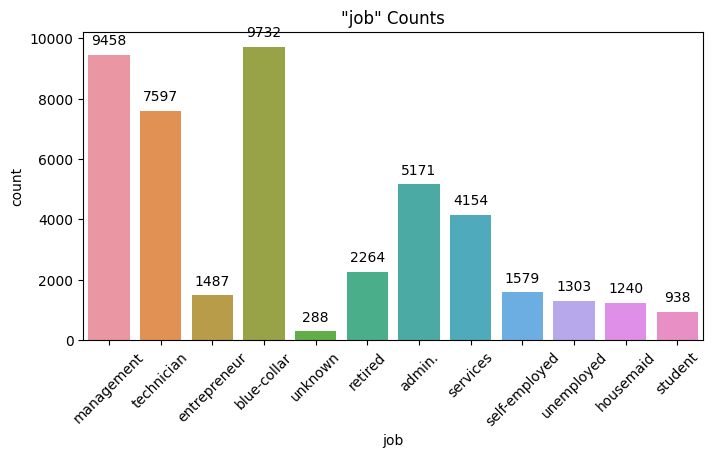

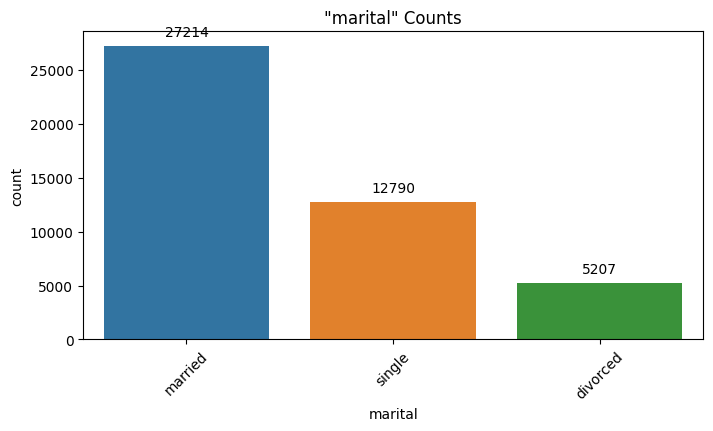

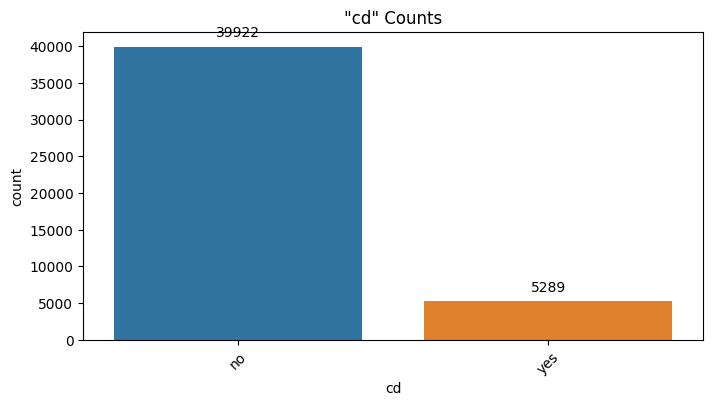

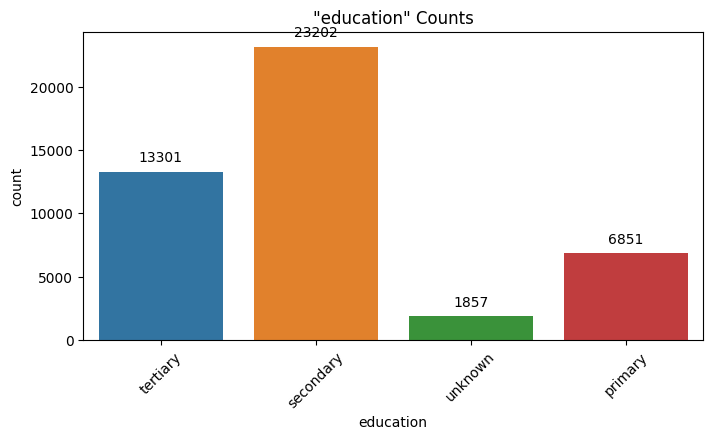

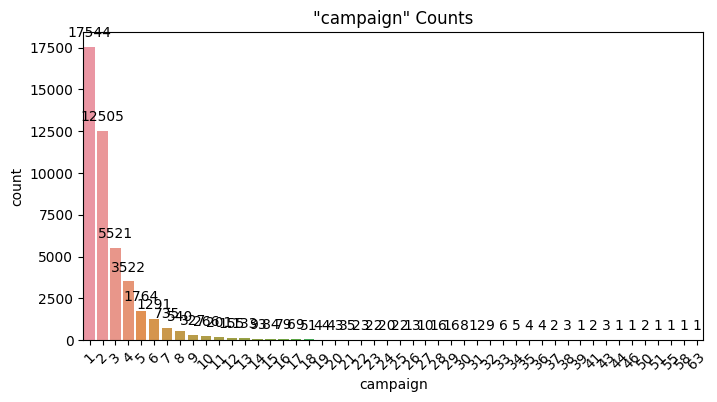

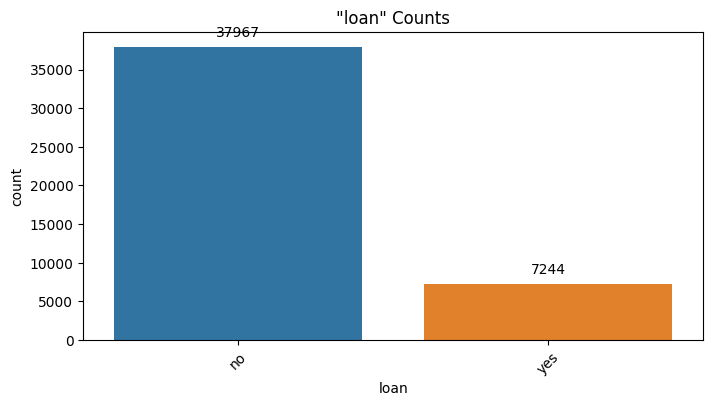

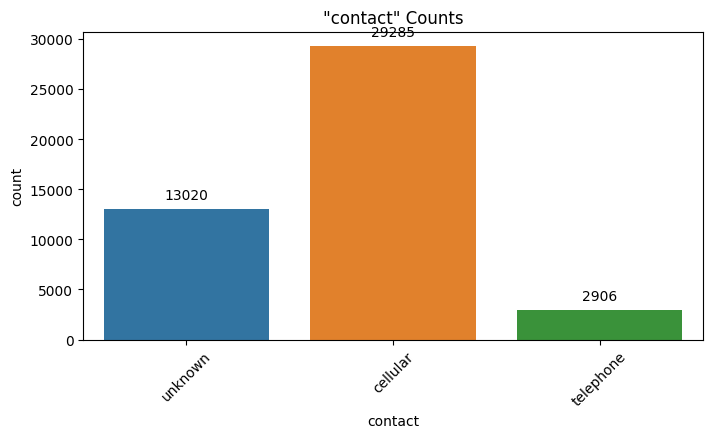

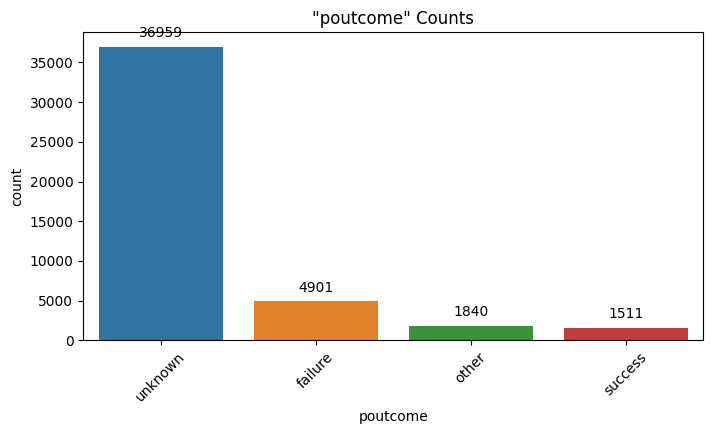

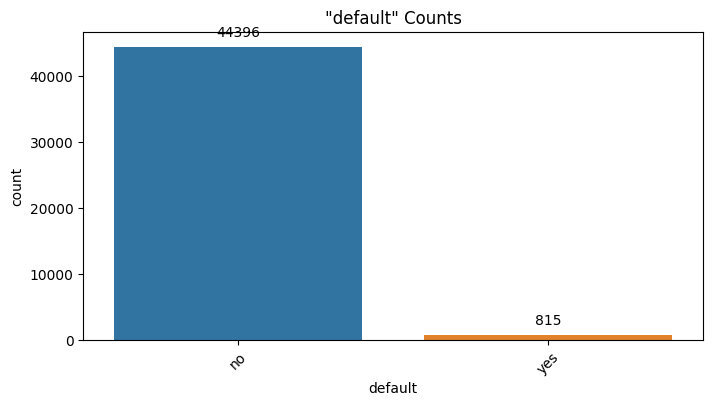

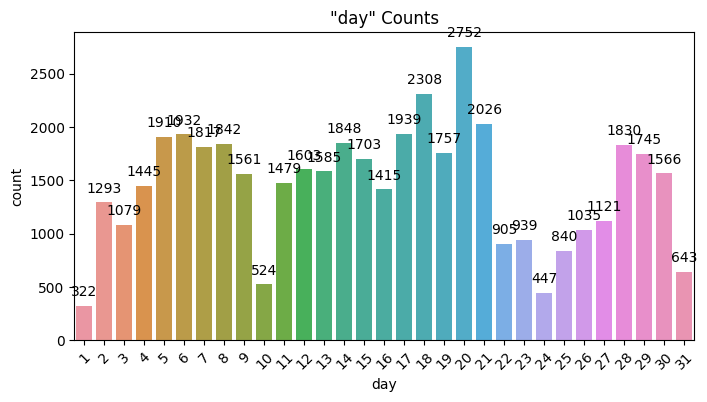

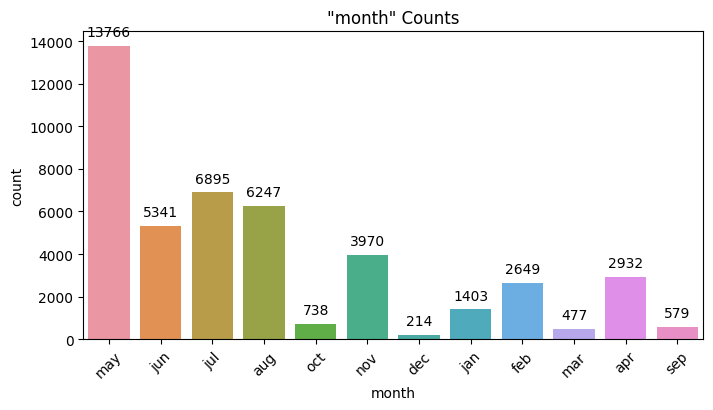

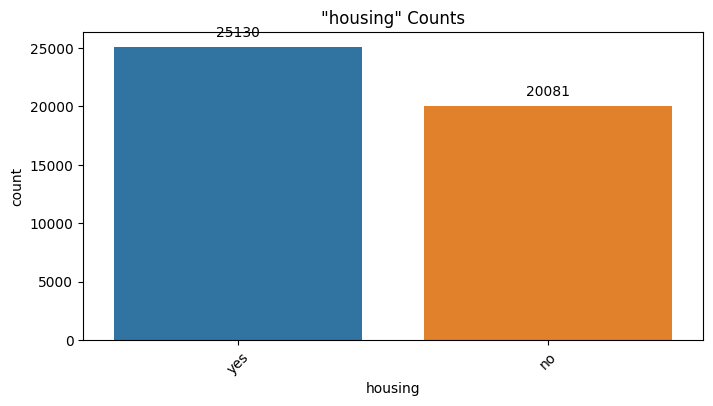

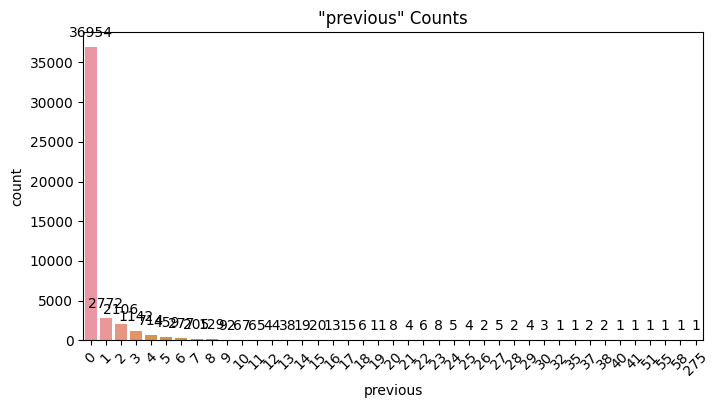

<Figure size 800x400 with 0 Axes>

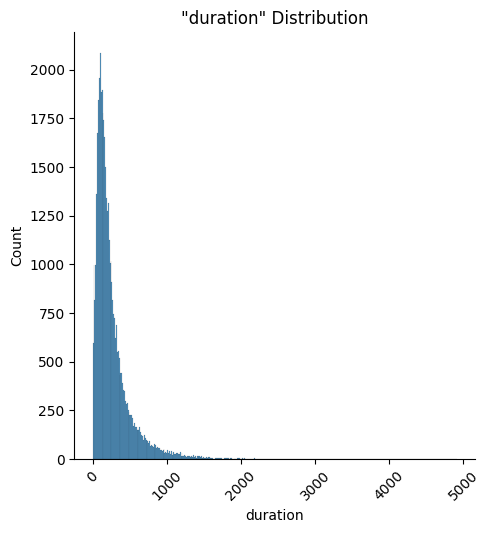

<Figure size 800x400 with 0 Axes>

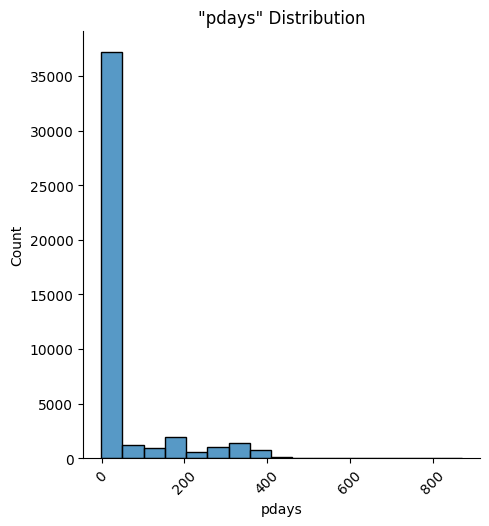

<Figure size 800x400 with 0 Axes>

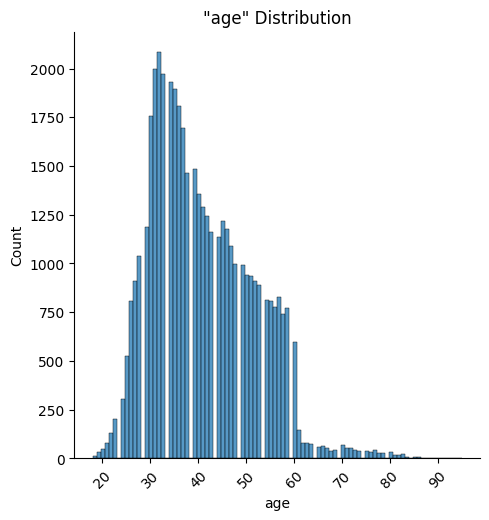

<Figure size 800x400 with 0 Axes>

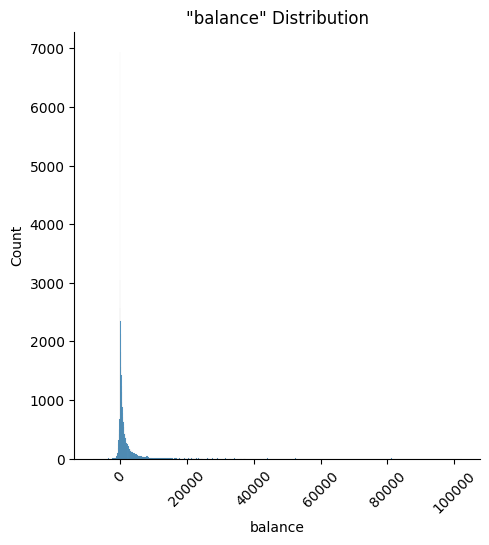

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

high_carinality = ["duration", "pdays", "age", "balance"]
categorical = train.select_dtypes(include=['object', 'int']).columns.values
categorical = list(set(categorical) - set(high_carinality))
features = categorical + high_carinality

for column in features:
    plt.figure(figsize=(8, 4))
    if column in categorical:
        count_plot = sns.countplot(x=train[column], data=train)
        for p in count_plot.patches:
            count_plot.annotate(
                format(p.get_height()),
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha = 'center',
                va = 'center',
                xytext = (0, 10),
                textcoords = 'offset points'
            )
        plt.title(f"\"{column}\" Counts")
        plt.xticks(rotation=45)
        plt.show()
    else:
        dist_plot = sns.displot(data=train, x=column)
        plt.title(f"\"{column}\" Distribution")
        plt.xticks(rotation=45)
        plt.show()


Como la mayoría de los datos presentes en el *dataset* corresponden a variables categóricas, es necesario transformar primero dichas variables a numéricas y posterior a esto, volver a efectuar EDA sobre los datos transformados.

## Imputación

In [25]:
import numpy as np


train.replace("unknown", np.nan, inplace=True)
test.replace("unknown", np.nan, inplace=True)

In [26]:
from typing import NoReturn

import missingno as msno
from prettytable import PrettyTable


def quantify_missing(dataframe: pd.DataFrame, tol: float) -> NoReturn:
    missing_value = dataframe.isnull().mean() * 100
    missing_value_dict = missing_value.to_dict()
    missing_percentage = missing_value > tol
    missing_percentage = missing_percentage.to_dict()
    count = 0
    table = PrettyTable(
        ['Feature', 'Missing Value Percentage'], float_format='3.2'
    )
    features = []
    for key in missing_percentage:
        if missing_percentage[key]:
            table.add_row([key, np.round(missing_value_dict[key], 8)])
            count = count + 1
            features.append(key)
    print(table)
    print('Total quantified features:', count)

In [13]:
print(f"[INFO] Percentages of missing values for the training dataset (rows: {train.shape[0]}):")
quantify_missing(dataframe=train, tol=0.0)

print(f"\n[INFO] Percentages of missing values for the testing dataset (rows: {test.shape[0]}):")
quantify_missing(dataframe=test, tol=0.0)

[INFO] Percentages of missing values for the training dataset (rows: 45211):
+-----------+--------------------------+
|  Feature  | Missing Value Percentage |
+-----------+--------------------------+
|    job    |           0.64           |
| education |           4.11           |
|  contact  |          28.80           |
|  poutcome |          81.75           |
+-----------+--------------------------+
Total quantified features: 4

[INFO] Percentages of missing values for the testing dataset (rows: 4521):
+-----------+--------------------------+
|  Feature  | Missing Value Percentage |
+-----------+--------------------------+
|    job    |           0.84           |
| education |           4.14           |
|  contact  |          29.29           |
|  poutcome |          81.95           |
+-----------+--------------------------+
Total quantified features: 4


[INFO] Analysis of missing values for the training dataset (rows: 45211):


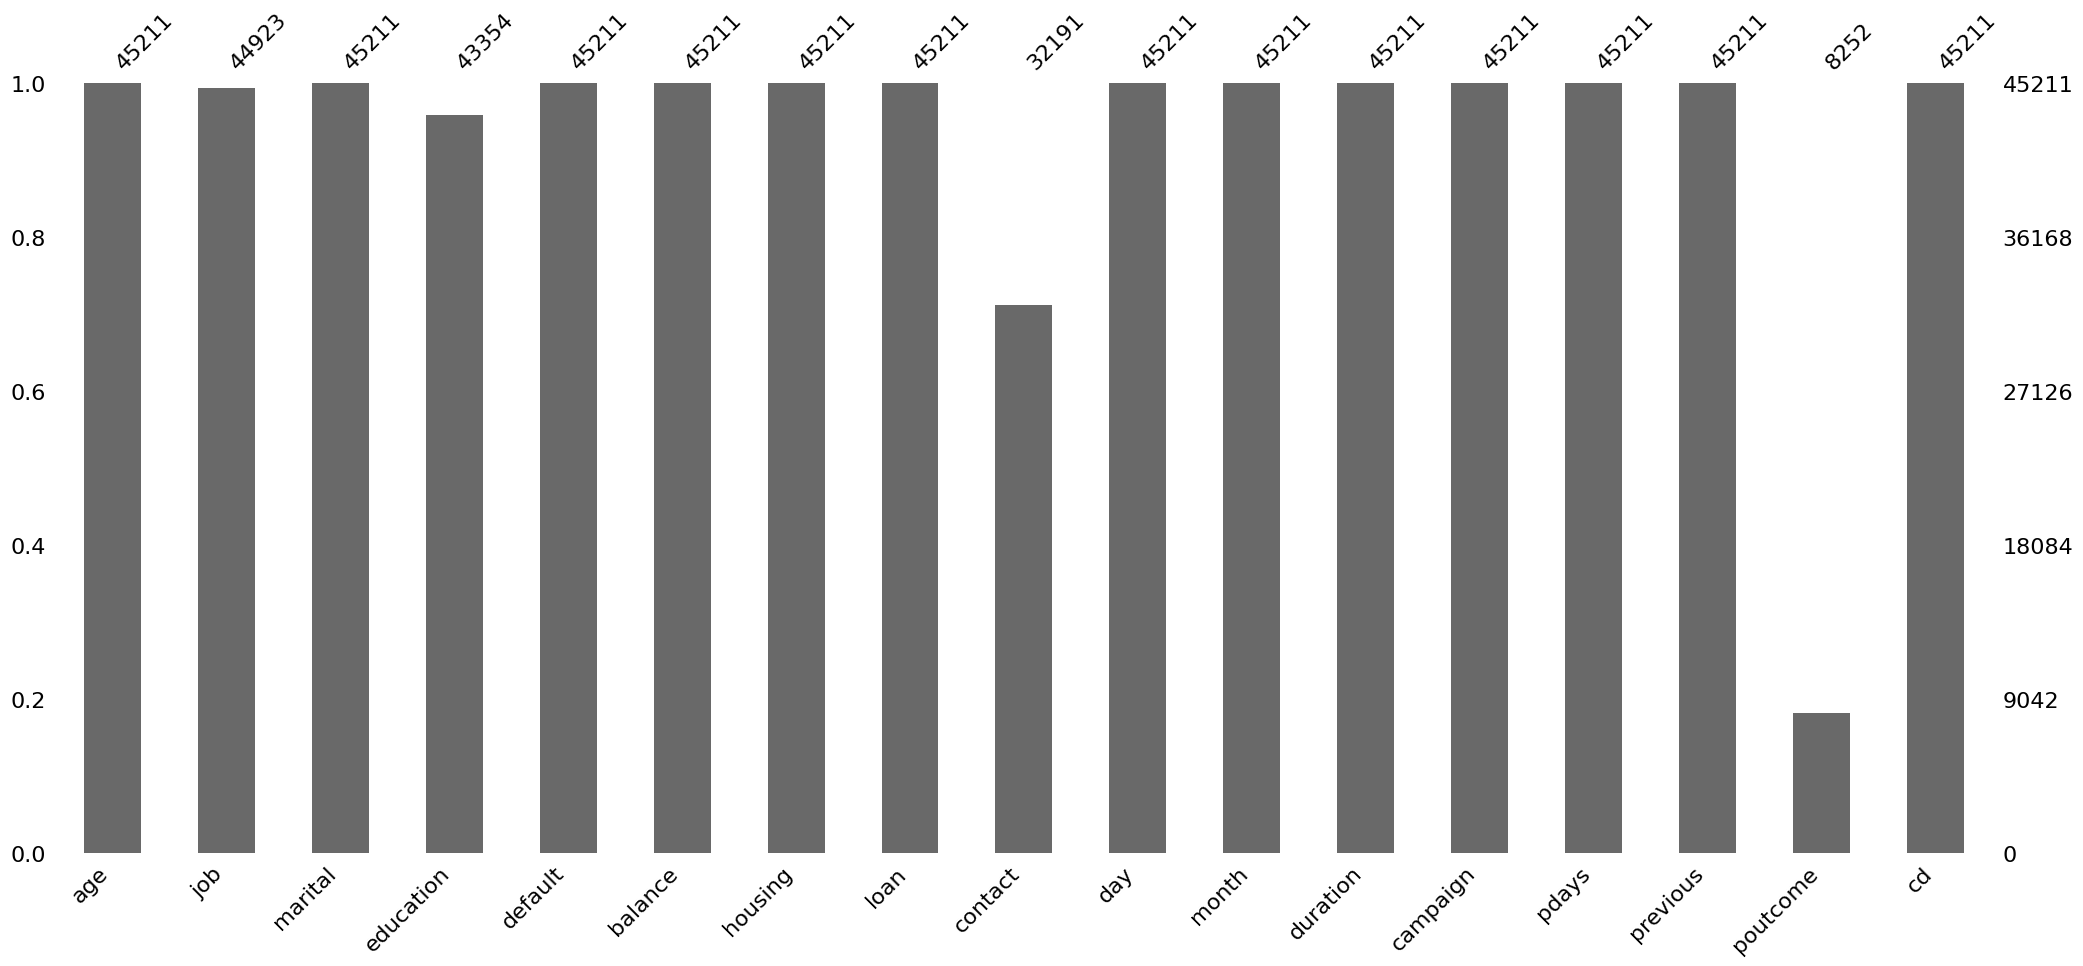

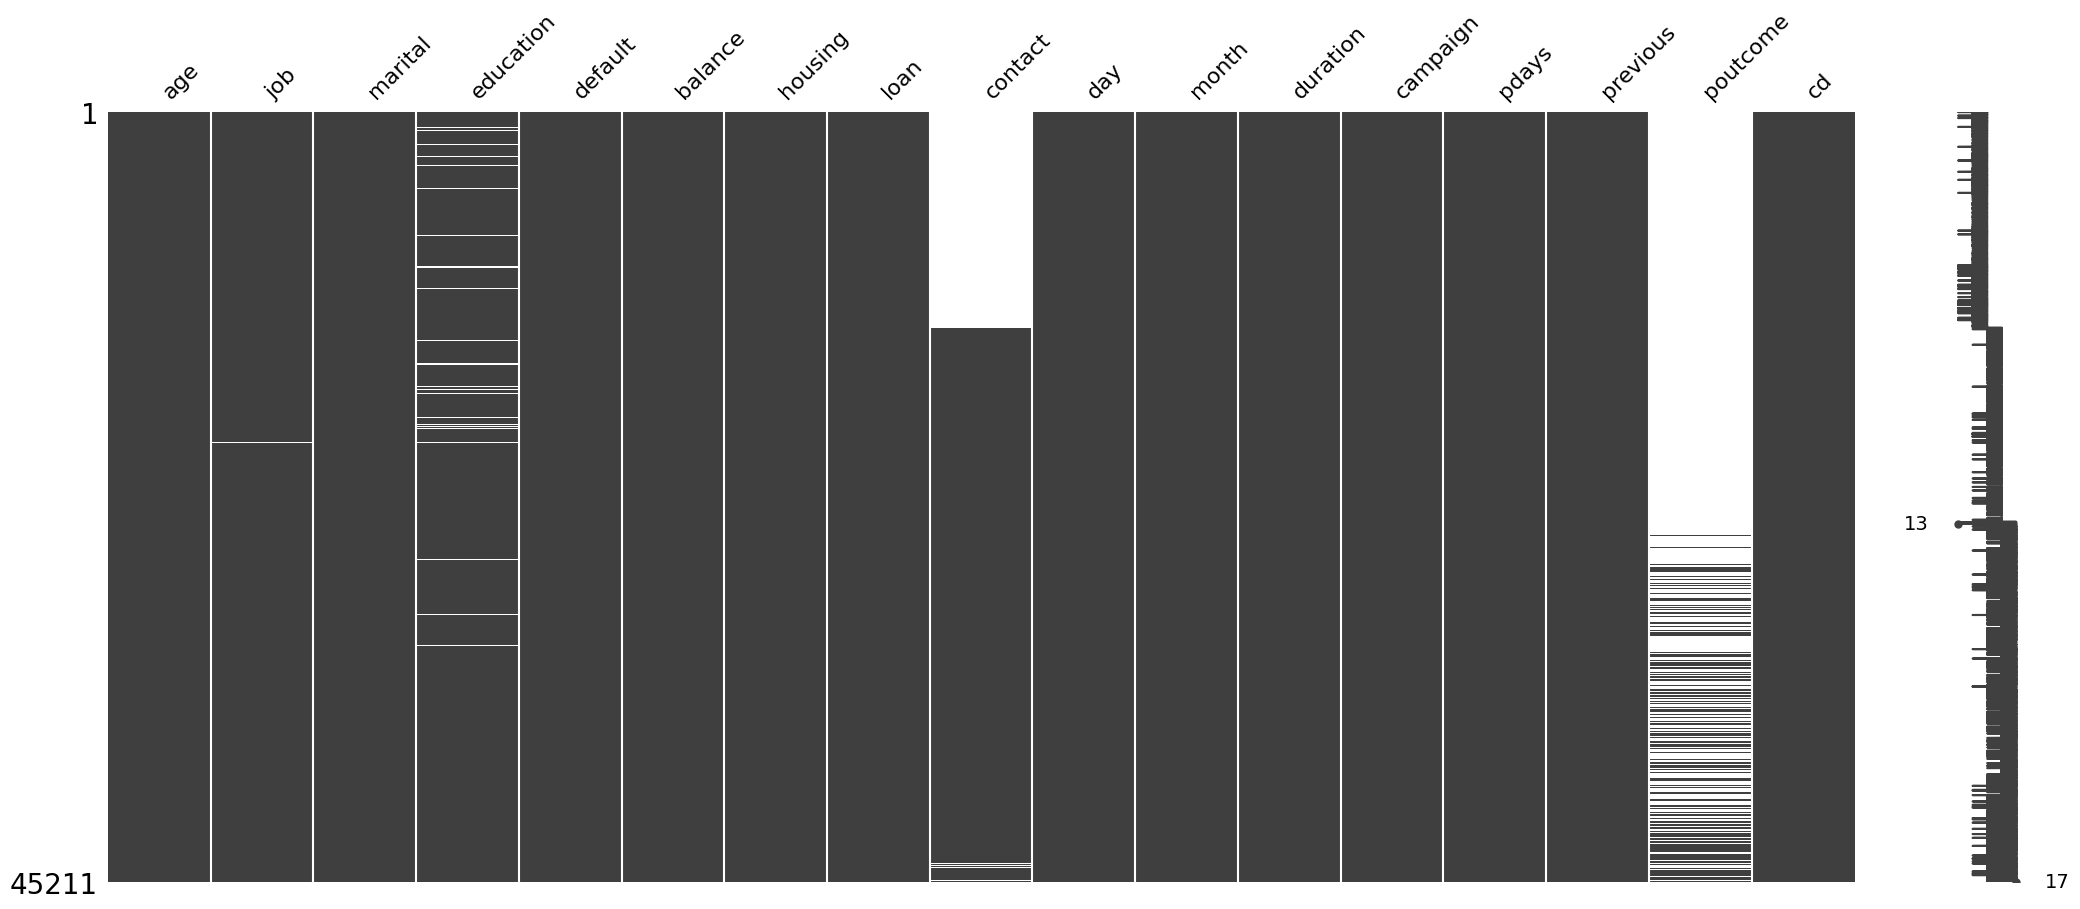

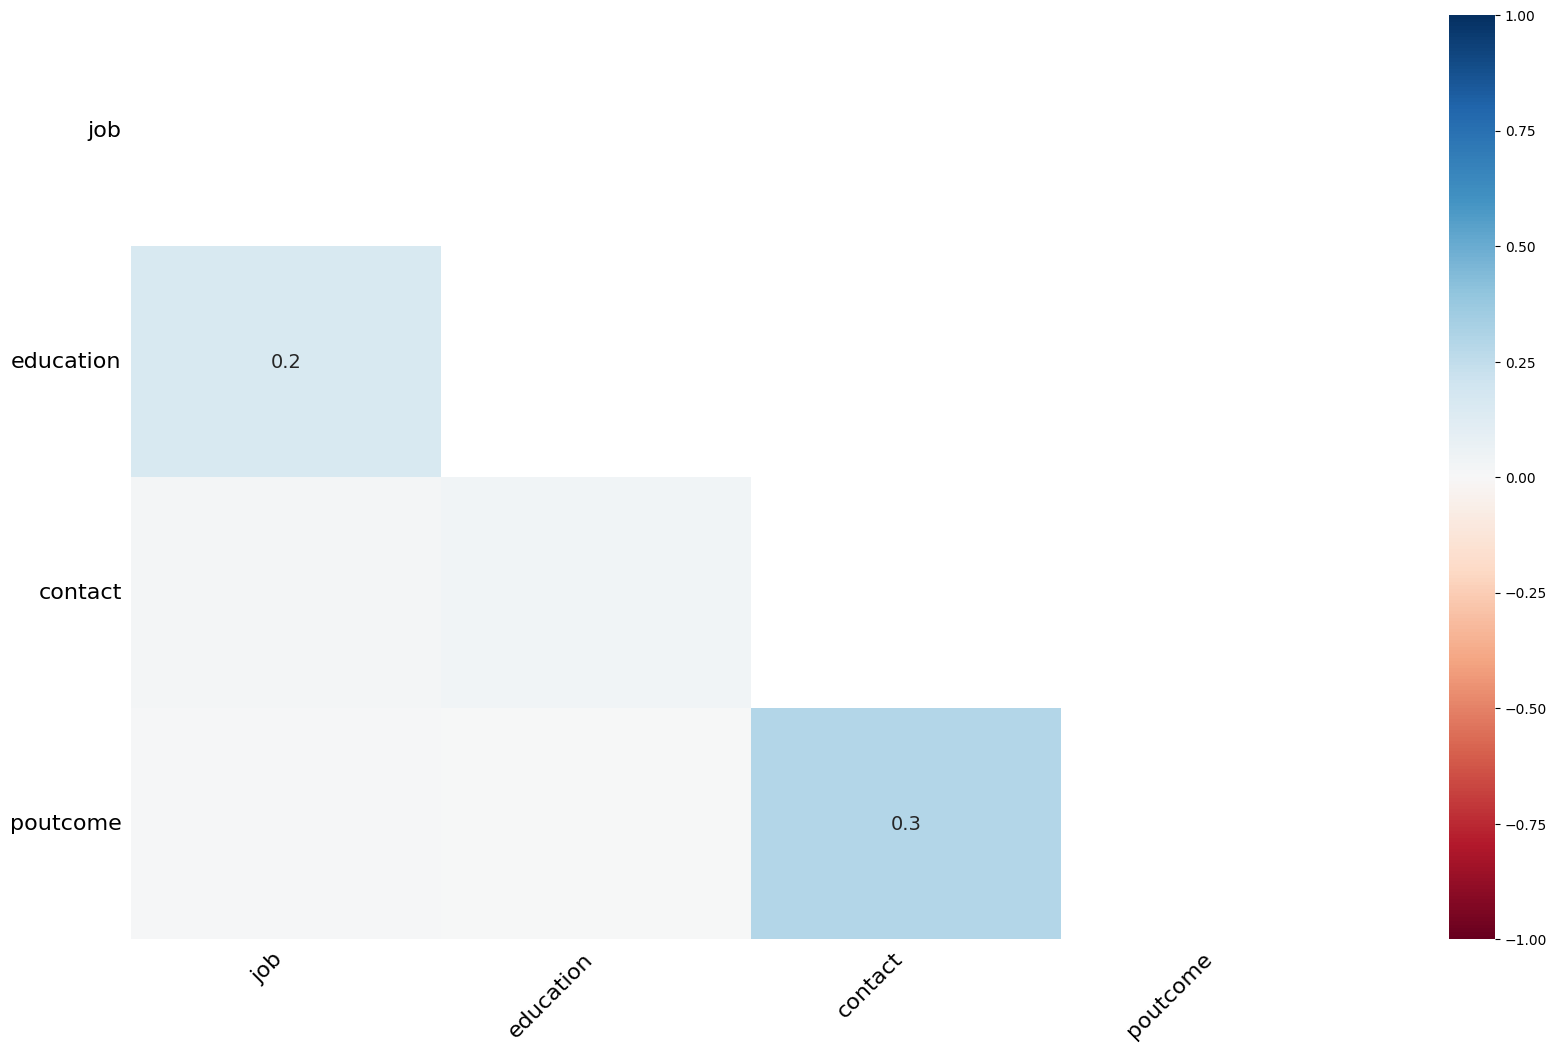

In [14]:
print(f"[INFO] Analysis of missing values for the training dataset (rows: {train.shape[0]}):")
msno.bar(train)
plt.show()

msno.matrix(train)
plt.show()

msno.heatmap(train)
plt.show()

In [15]:
train["contact"].value_counts(normalize=True, dropna=False)

cellular     0.647741
NaN          0.287983
telephone    0.064276
Name: contact, dtype: float64

In [16]:
train["poutcome"].value_counts(normalize=True, dropna=False)

NaN        0.817478
failure    0.108403
other      0.040698
success    0.033421
Name: poutcome, dtype: float64

Despues de analizar los valore faltantes, se define que:

- `job` y `education` seran imputadas mediante imputacion simple y la estrategia del valor mas frecuente.
- `contact` y `poutcome` seran descartadas del *dataset*.

,age,job,marital,education,default,balance,housing,loan,day,month,duration,campaign,pdays,previous,cd
0,58,management,married,tertiary,no,2143,yes,no,5,may,261,1,-1,0,no
1,44,technician,single,secondary,no,29,yes,no,5,may,151,1,-1,0,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,5,may,76,1,-1,0,no
3,47,blue-collar,married,secondary,no,1506,yes,no,5,may,92,1,-1,0,no
4,33,blue-collar,single,secondary,no,1,no,no,5,may,198,1,-1,0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,17,nov,977,3,-1,0,yes
45207,71,retired,divorced,primary,no,1729,no,no,17,nov,456,2,-1,0,yes
45208,72,retired,married,secondary,no,5715,no,no,17,nov,1127,5,184,3,yes
45209,57,blue-collar,married,secondary,no,668,no,no,17,nov,508,4,-1,0,no


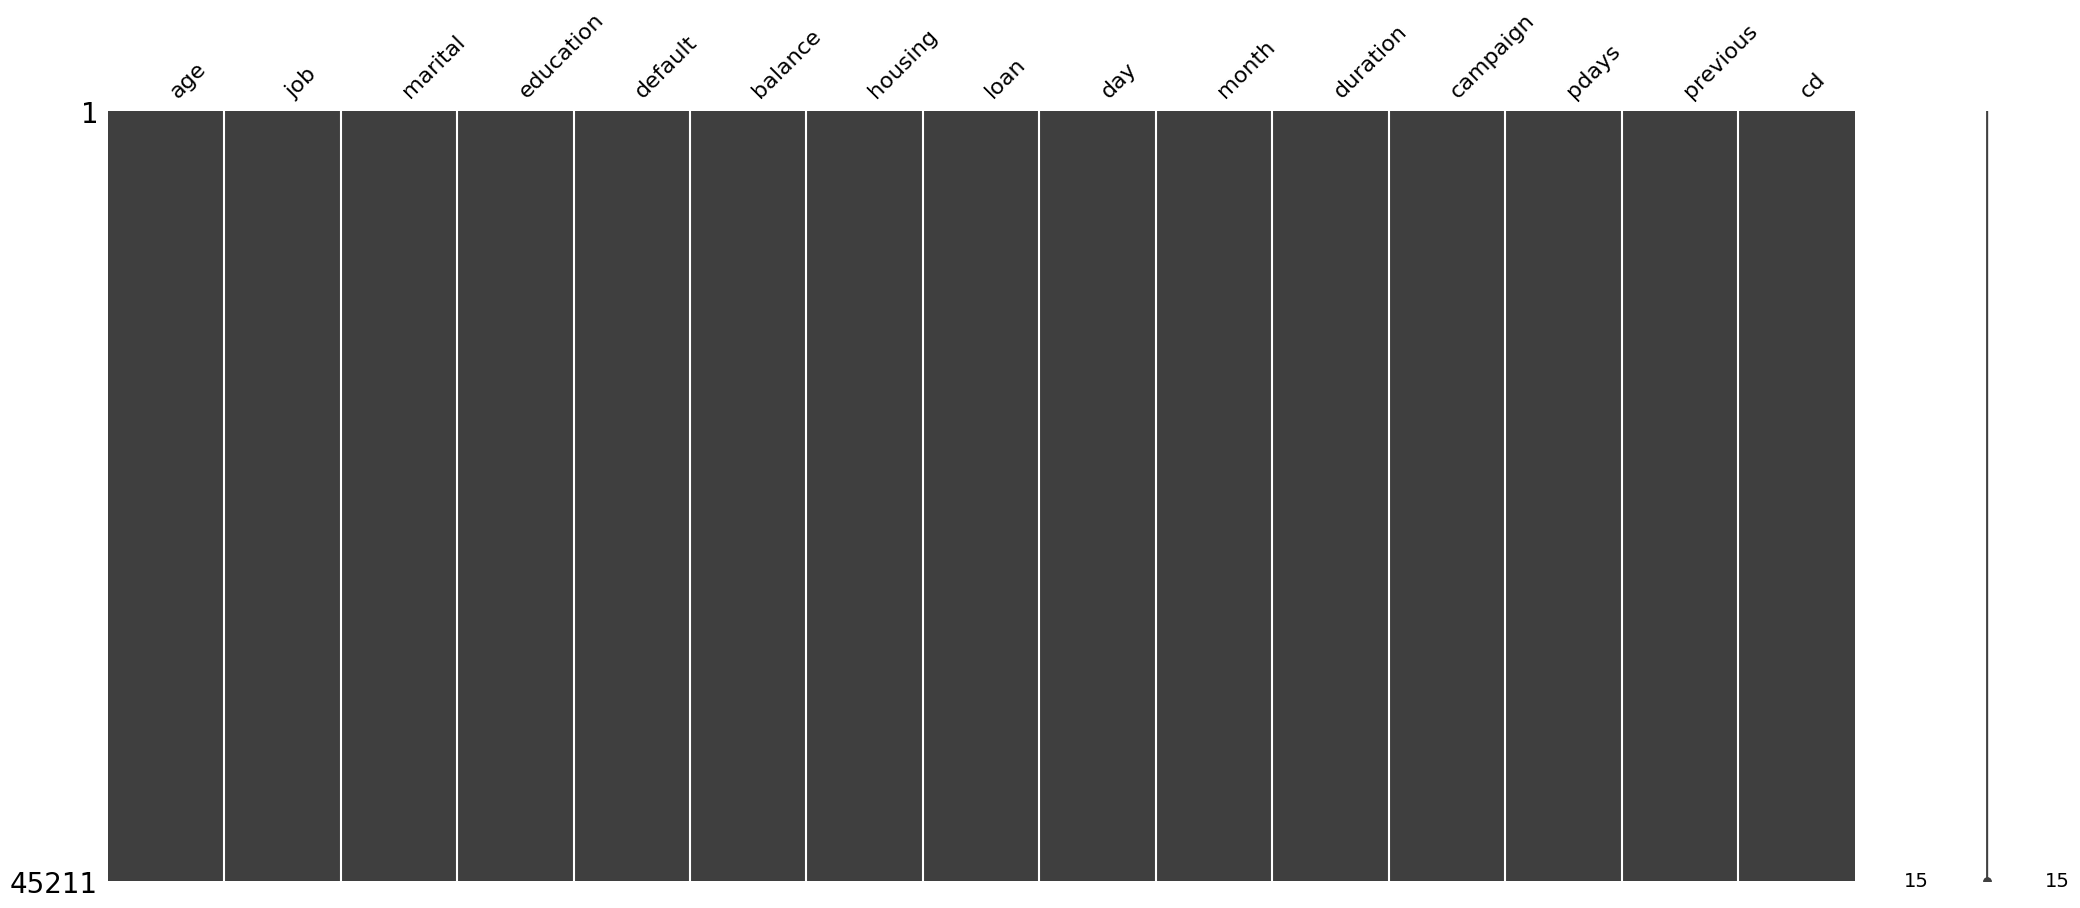

In [27]:
from sklearn.impute import SimpleImputer


imp_mode = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
imp_mode.fit(train[["job", "education"]])
train[["job", "education"]] = imp_mode.transform(train[["job", "education"]])

train.drop(["contact", "poutcome"], axis=1, inplace=True)

with pd.option_context('display.max_columns', None):
    display(train)

msno.matrix(train)
plt.show()

,age,job,marital,education,default,balance,housing,loan,day,month,duration,campaign,pdays,previous,cd
0,30,unemployed,married,primary,no,1787,no,no,19,oct,79,1,-1,0,no
1,33,services,married,secondary,no,4789,yes,yes,11,may,220,1,339,4,no
2,35,management,single,tertiary,no,1350,yes,no,16,apr,185,1,330,1,no
3,30,management,married,tertiary,no,1476,yes,yes,3,jun,199,4,-1,0,no
4,59,blue-collar,married,secondary,no,0,yes,no,5,may,226,1,-1,0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4516,33,services,married,secondary,no,-333,yes,no,30,jul,329,5,-1,0,no
4517,57,self-employed,married,tertiary,yes,-3313,yes,yes,9,may,153,1,-1,0,no
4518,57,technician,married,secondary,no,295,no,no,19,aug,151,11,-1,0,no
4519,28,blue-collar,married,secondary,no,1137,no,no,6,feb,129,4,211,3,no


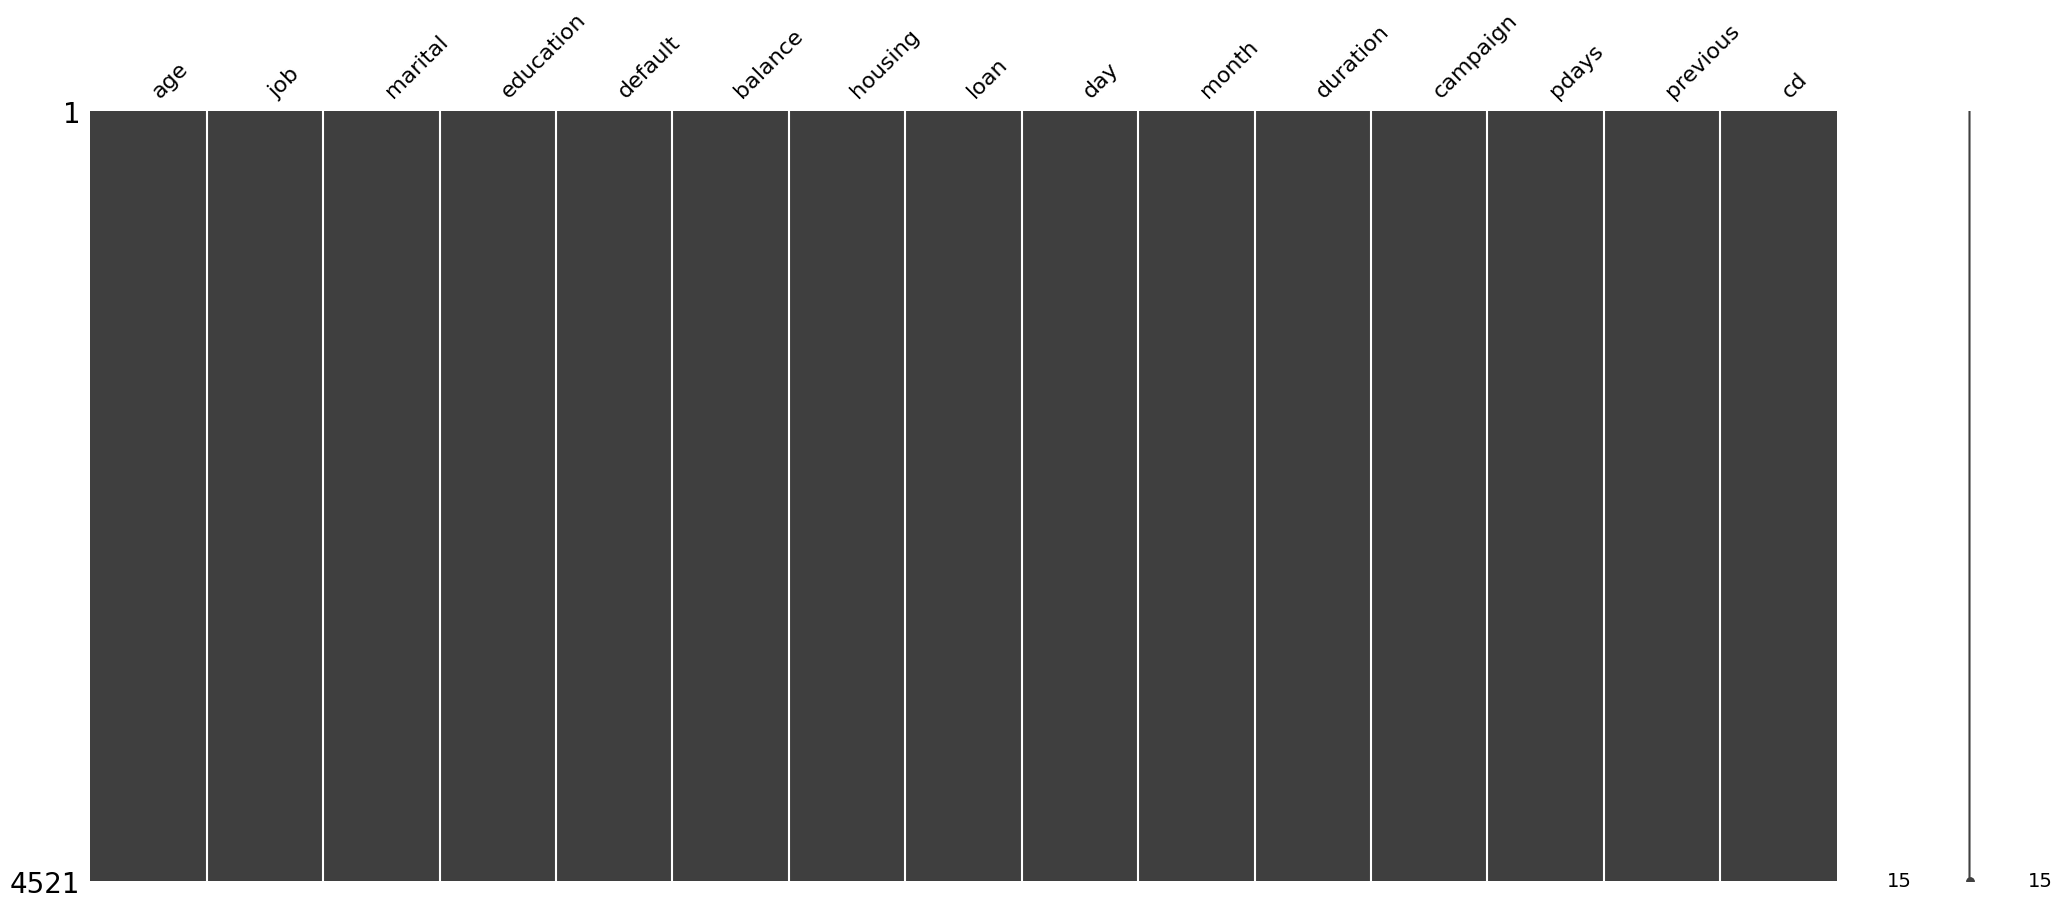

In [28]:
test[["job", "education"]] = imp_mode.transform(test[["job", "education"]])
test.drop(["contact", "poutcome"], axis=1, inplace=True)

with pd.option_context('display.max_columns', None):
    display(test)

msno.matrix(test)
plt.show()

## Remoción de *outliers*

In [35]:
def get_numeric_feature_info(feature: str, dataframe: pd.DataFrame) -> NoReturn:
    skewness = dataframe[feature].skew()
    kurtosis = dataframe[feature].kurt()

    print(f"[INFO] Minimum value of \"{feature}\": %f" % dataframe[feature].min())
    print(f"[INFO] Maximum value of \"{feature}\": %f" % dataframe[feature].max())
    print(f"[INFO] Skewness of \"{feature}\": %f" % skewness)
    print(f"[INFO] Kurtosis of \"{feature}\": %f" % kurtosis)
    print(
        f"[INFO] The \"{feature}\" feature is normaly distributed!\n"
        if (-2 <= skewness <= 2) and (-7 <= kurtosis <= 7)
        else f"[INFO] The \"{feature}\" feature does not correspond to a normal distribution!\n"
    )


for feature in high_carinality:
    get_numeric_feature_info(feature=feature, dataframe=train)

[INFO] Minimum value of "duration": 0.000000
[INFO] Maximum value of "duration": 4918.000000
[INFO] Skewness of "duration": 3.144318
[INFO] Kurtosis of "duration": 18.153915
[INFO] The "duration" feature does not correspond to a normal distribution!

[INFO] Minimum value of "pdays": -1.000000
[INFO] Maximum value of "pdays": 871.000000
[INFO] Skewness of "pdays": 2.615715
[INFO] Kurtosis of "pdays": 6.935195
[INFO] The "pdays" feature does not correspond to a normal distribution!

[INFO] Minimum value of "age": 18.000000
[INFO] Maximum value of "age": 95.000000
[INFO] Skewness of "age": 0.684818
[INFO] Kurtosis of "age": 0.319570
[INFO] The "age" feature is normaly distributed!

[INFO] Minimum value of "balance": -8019.000000
[INFO] Maximum value of "balance": 102127.000000
[INFO] Skewness of "balance": 8.360308
[INFO] Kurtosis of "balance": 140.751547
[INFO] The "balance" feature does not correspond to a normal distribution!



Se concluye entonces que no se debe aplicar una remoción de *outliers*.

## Ingeniería de características

En cuanto al proceso de ingeniería de características, el gerente comercial y de marketing nos comenta que recientemente ha leído el artículo "[How Age Impacts Consumer Behavior in Retail Banking](https://thefinancialbrand.com/news/financial-education/age-consumer-behavior-patterns-banking-61246/)". El gerente nos explica que en términos generales, el artículo propone un análisis segmentado de cuales son los productos y servicios que más les interesa a los clientes del sector bancario, en términos de  rangos de edad. El gerente manifiesta su interés en llevar este conocimiento al algoritmo de *machine learning*.

<p align="center">
  <a target="_blank">
    <img width="500px" src="https://thefinancialbrand.com/wp-content/uploads/2016/09/financial_education_topics.png" alt="standard-correlation">
  </a>
</p><br><br>

In [16]:
age_ranges = {
    1: (18, 25),
    2: (25, 35),
    3: (35, 45),
    4: (45, 55),
    5: (55, 65),
    6: (65,75),
    7: (75, 85),
    8: (85, 200)
}


def transform_age_to_categorical(ages, age_ranges):
    cat_age = [[
        ranges_index for ranges_index, range in age_ranges.items()
        if range[0] <= age < range[1]
    ] for age in ages]

    return [item for sublist in cat_age for item in sublist]


train["cat_age"] = transform_age_to_categorical(train["age"].tolist(), age_ranges)
test["cat_age"] = transform_age_to_categorical(test["age"].tolist(), age_ranges)

train = train.select_dtypes("number")
with pd.option_context('display.max_columns', None):
    display(train)

,age,default,balance,housing,loan,day,duration,campaign,pdays,previous,cd,cat_age
0,58,0,2143,1,0,5,261,1,-1,0,0,5
1,44,0,29,1,0,5,151,1,-1,0,0,3
2,33,0,2,1,1,5,76,1,-1,0,0,2
3,47,0,1506,1,0,5,92,1,-1,0,0,4
4,33,0,1,0,0,5,198,1,-1,0,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,0,825,0,0,17,977,3,-1,0,1,4
45207,71,0,1729,0,0,17,456,2,-1,0,1,6
45208,72,0,5715,0,0,17,1127,5,184,3,1,6
45209,57,0,668,0,0,17,508,4,-1,0,0,5


## Transformación de características

In [ ]:
for feature in ["default", "housing", "loan", "cd"]:
    train[feature] = train[feature].replace(["yes", "no"], [1, 0]).astype(int)
    test[feature] = test[feature].replace(["yes", "no"], [1, 0]).astype(int)

Necesitamos transformar las características categóricas. Las dos formas basicas para hacerlo son *labeling encoding* y el *one-hot encoding* (variante del *dummy encoding*).

- `job`: Usaremos *labeling encoding* porque hay muchas categorías.
- `education`: Usaremos la codificación de etiquetas porque es una característica categórica ordinal.
- `marital`: Usaremos *one-hot encoding*.
- `poutcome` : Usaremos *one-hot encoding*.

In [17]:
from sklearn.preprocessing import LabelEncoder


laenc = LabelEncoder()
train['job'] = laenc.fit_transform(train['job'])
train['education'] = laenc.fit_transform(train['education'])
train = pd.concat([
    train,
    pd.get_dummies(train["job"], prefix='job_'),
    pd.get_dummies(train["marital"], prefix='marital_'),
    pd.get_dummies(train["poutcome"], prefix='poutcome_')
], axis=1)
train.drop(["marital", "poutcome"], axis=1, inplace=True)

test = pd.concat([
    test,
    pd.get_dummies(test["job"], prefix='job_'),
    pd.get_dummies(test["marital"], prefix='marital_'),
    pd.get_dummies(test["poutcome"], prefix='poutcome_')
], axis=1)
test.drop(["marital", "poutcome"], axis=1, inplace=True)

with pd.option_context('display.max_columns', None):
    print(f"[INFO] Training dataset dimnesions (rows, cols): {train.shape}")
    display(train.head())

KeyError: 'job'

In [40]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import chi2
from sklearn.feature_selection import f_classif
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
from sklearn.metrics import accuracy_score, confusion_matrix, recall_score, precision_score, f1_score, auc
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

In [49]:
import matplotlib.pyplot as plt
import seaborn as sns


def plot_corr(data: pd.DataFrame, title: str, method: str = "pearson", annot: bool = True):
    f,ax = plt.subplots(figsize=(10,8))
    sns.heatmap(
        data.corr(method=method),
        vmin=-1,
        vmax=1,
        annot=annot,
        linewidths=.5,
        fmt='.2f',
        ax=ax
    )
    plt.title(f"{method.title()}'s Correlation Coefficient between {title}")
    return ax

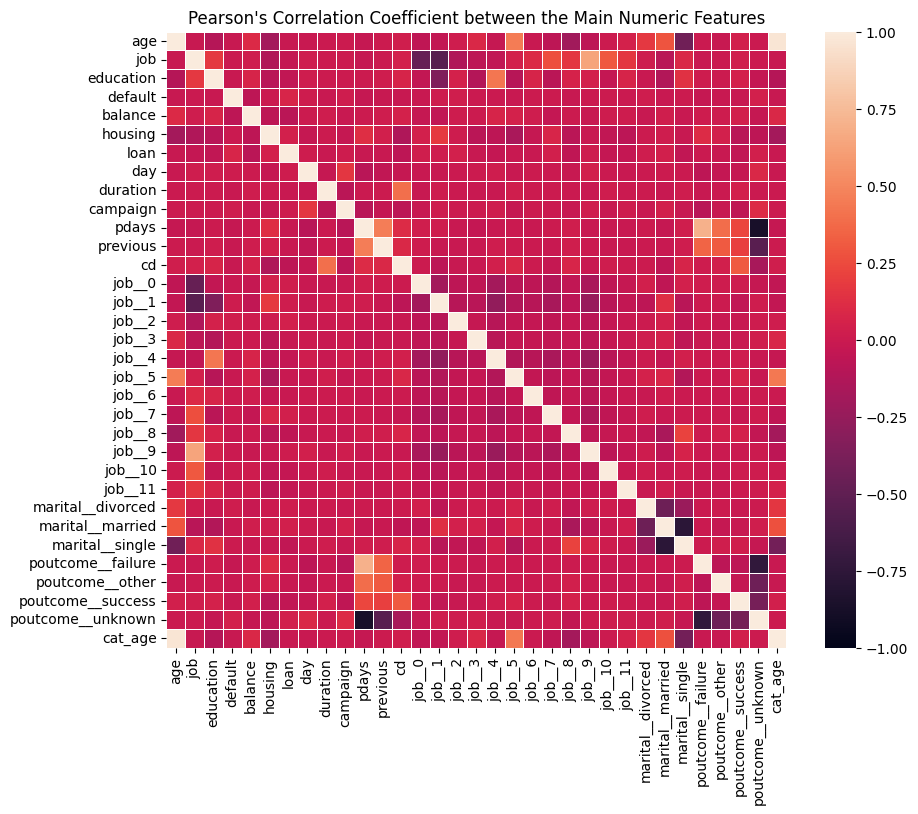

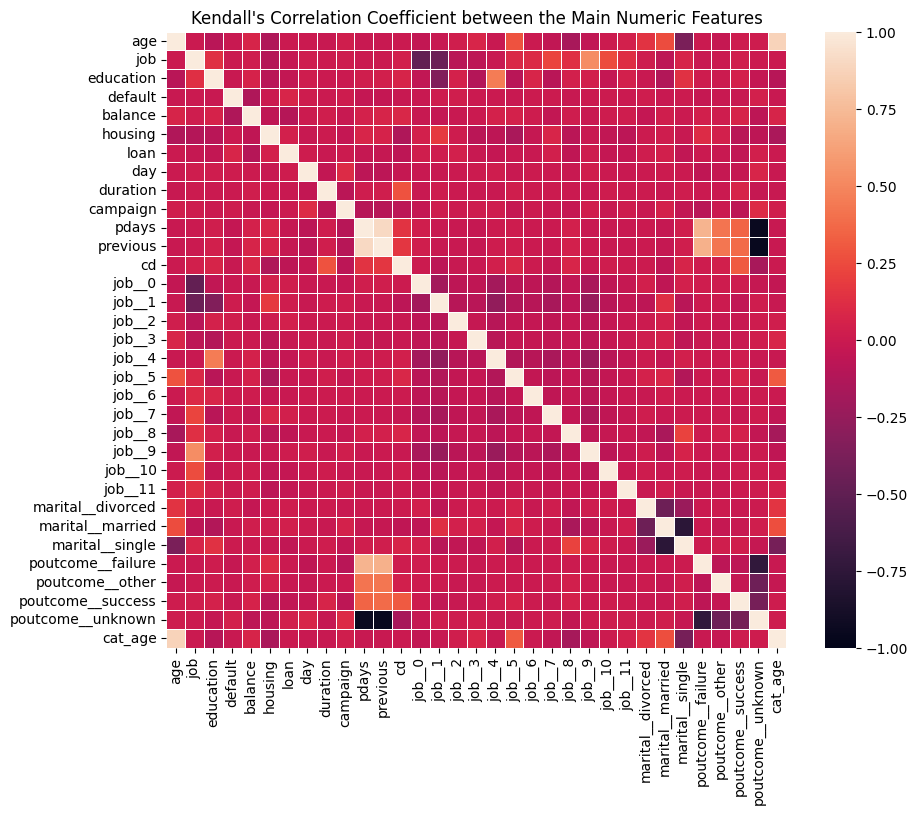

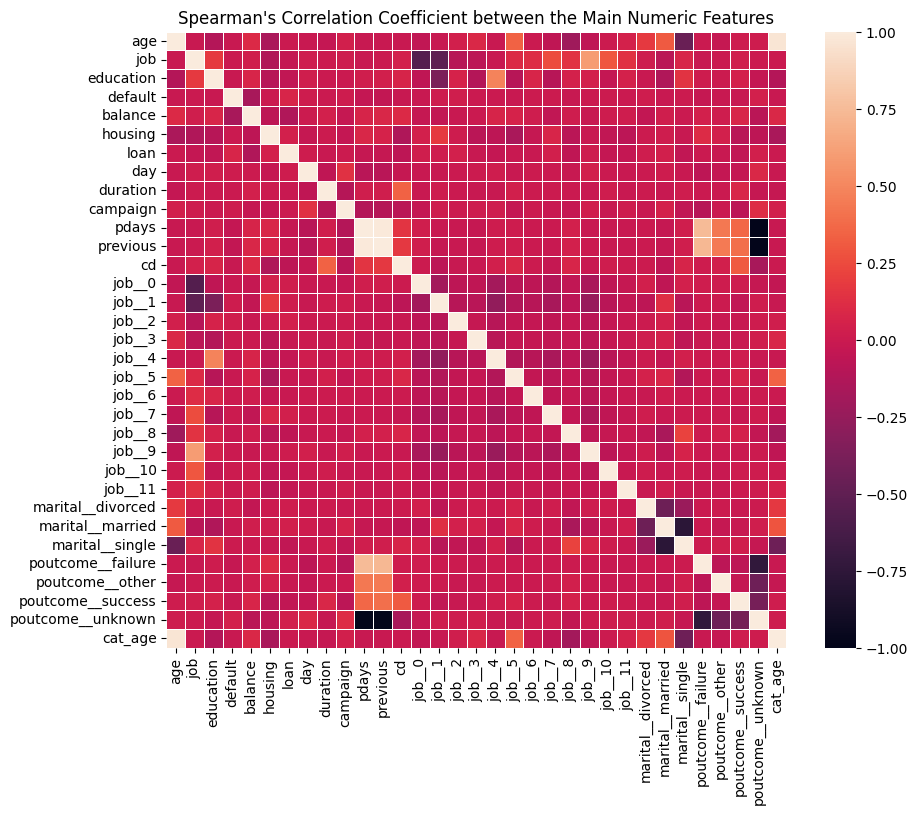

In [52]:
for method in ["pearson", "kendall", "spearman"]:
    ax = plot_corr(
        train,
        title="the Main Numeric Features",
        method=method,
        annot=False
    )
    plt.show()

In [54]:
import numpy as np


def plot_scatter_and_corr(
    dataframe: pd.DataFrame,
    x_feature: str,
    y_feature:str,
    ax: np.array = None,
    pos: int = None
) -> np.array:
    if ax is None:
        f, ax = plt.subplots(1, 2, figsize=(10,4))

    pos = 0 if pos is None else 1

    r, _ = scipy.stats.pearsonr(
        dataframe[x_feature].tolist(), dataframe[y_feature].tolist()
    )
    tau, _ = scipy.stats.kendalltau(
        dataframe[x_feature].tolist(), dataframe[y_feature].tolist()
    )
    ax[pos].scatter(
        dataframe[x_feature].tolist(),
        dataframe[y_feature].tolist(),
        alpha=0.2,
        color="#FC5185" if pos == 1 else "#364F6B",
        label=f"r={np.round(r, 2)}, tau={np.round(tau, 2)}"
    )
    ax[pos].set_xlabel(x_feature)
    ax[pos].set_ylabel(y_feature)
    ax[pos].set_title(f"{y_feature} vs. {x_feature}")
    ax[pos].tick_params(axis='x', rotation=45)
    ax[pos].legend()

    plt.tight_layout()

    return ax

Los datos se consideran Gaussianos si la asimetría (*Skewness*) está entre -2 y +2 y la curtosis está entre -7 y +7.²²<br><br>

---

²² <a href="https://imaging.mrc-cbu.cam.ac.uk/statswiki/FAQ/Simon#:~:text=The%20values%20for%20asymmetry%20and,between%20%E2%80%907%20to%20%2B7.">Testing normality including skewness and kurtosis</a>.

**Detección de Anomalías Univariada:** ***Machine Learning***

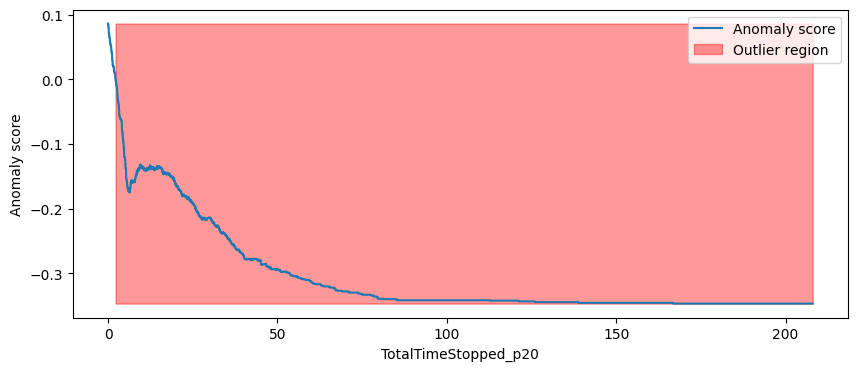

In [52]:
from sklearn.ensemble import IsolationForest

isolation_forest = IsolationForest(n_estimators=100, random_state=42)
isolation_forest.fit(subtrain[target].values.reshape(-1, 1))
xx = np.linspace(subtrain[target].min(), subtrain[target].max(), len(subtrain)).reshape(-1,1)
anomaly_score = isolation_forest.decision_function(xx)
outlier_flag = isolation_forest.predict(xx)

plt.figure(figsize=(10,4))
plt.plot(xx, anomaly_score, label='Anomaly score')
plt.fill_between(
    xx.T[0],
    np.min(anomaly_score),
    np.max(anomaly_score), 
    where=outlier_flag==-1,
    color='r', 
    alpha=.4,
    label='Outlier region'
)
plt.legend()
plt.ylabel('Anomaly score')
plt.xlabel(target)
plt.show()

In [53]:
outlier_flag = pd.Series(outlier_flag).replace([-1, 1], [False, True])
print(outlier_flag.value_counts(normalize=True))
print(
    "\n[INFO] Some possible outliers according to the standard deviation methodod for the "
    f"target \"{target}\"\n", subtrain[outlier_flag][target].sample(20).tolist()
)

False    0.989432
True     0.010568
dtype: float64

[INFO] Some possible outliers according to the standard deviation methodod for the target "TotalTimeStopped_p20"
 [0.0, 9.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 19.0]


**Detección de Anomalías Multivariada:** ***Machine Learning***

In [54]:
from typing import List, NoReturn, Tuple

import pyod.models
from sklearn.preprocessing import MinMaxScaler


def scale_min_max(dataframe: pd.DataFrame, columns: List[str]) -> Tuple[np.array, pd.DataFrame]:
    minmax = MinMaxScaler(feature_range=(0, 1))
    dataframe[[f"scaled_{columns[0]}", f"scaled_{columns[1]}"]] = minmax.fit_transform(dataframe[columns])
    scaled_X = np.concatenate((
        dataframe[f"scaled_{columns[0]}"].values.reshape(-1,1),
        dataframe[f"scaled_{columns[1]}"].values.reshape(-1,1)
    ),axis=1)
    return scaled_X, dataframe


def prepare_data_visualization(
    clf,
    y_pred: np.array,
    scores_pred: np.array,
    dataframe: pd.DataFrame,
    columns: List[str],
    outliers_fraction: float,
) -> Tuple[pd.DataFrame, float, np.array, np.array, np.array, np.array, np.array, np.array, np.array]:
    xx , yy = np.meshgrid(np.linspace(0, 1, 100), np.linspace(0, 1, 100))
    dataframe_ = deepcopy(dataframe)
    dataframe_['outlier'] = y_pred.tolist()
        
    inliers_col0 = np.array(dataframe_[f"scaled_{columns[0]}"][dataframe_['outlier'] == 0]).reshape(-1,1)
    inliers_col1 = np.array(dataframe_[f"scaled_{columns[1]}"][dataframe_['outlier'] == 0]).reshape(-1,1)
    outliers_col0 = dataframe_["scaled_DistanceToFirstStop_p20"][dataframe_['outlier'] == 1].values.reshape(-1,1)
    outliers_col1 = dataframe_["scaled_TotalTimeStopped_p20"][dataframe_['outlier'] == 1].values.reshape(-1,1)

    threshold = np.percentile(scores_pred, 100 * outliers_fraction)

    Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()]) * -1
    Z = Z.reshape(xx.shape)

    return dataframe_, threshold, xx, yy, Z, inliers_col0, inliers_col1, outliers_col0, outliers_col1


def plot_detected_outliers(
    threshold: float,
    xx: np.array,
    yy: np.array,
    Z: np.array,
    inliers_col0: np.array,
    inliers_col1: np.array,
    outliers_col0: np.array,
    outliers_col1: np.array,
    columns: List[str],
    title: str,
    show: bool = True
) -> NoReturn:
    plt.figure(figsize=(8, 8))
    plt.contourf(xx, yy, Z, levels=np.linspace(Z.min(), threshold, 7),cmap=plt.cm.Blues_r)
    decision_boundary = plt.contour(xx, yy, Z, levels=[threshold],linewidths=2, colors='red')
    plt.contourf(xx, yy, Z, levels=[threshold, Z.max()],colors='orange')
    inliers_scatter = plt.scatter(inliers_col0, inliers_col1, c='white',s=20, edgecolor='k')    
    outliers_scatter = plt.scatter(outliers_col0, outliers_col1, c='black',s=20, edgecolor='k')       
    plt.axis('tight')  
    plt.legend(
        [decision_boundary.collections[0], inliers_scatter, outliers_scatter],
        ['Learned decision function', 'Inliers', 'Outliers'],
        prop=mpl.font_manager.FontProperties(size=12),
        loc='upper right'
    )
    plt.xlabel(f"Scaled \"{columns[0]}\"")
    plt.ylabel(f"Scaled \"{columns[1]}\"")
    plt.xlim((0, 1))
    plt.ylim((0, 1))
    plt.title(f'{title}')
    if show:
        plt.show()


def detect_outliers(
    clf: pyod.models,
    y_pred: np.array,
    scores_pred: np.array,
    dataframe: pd.DataFrame,
    columns: List[str],
    title: str,
    outliers_fraction: float,
    show: bool = True
) -> pd.DataFrame:
    dataframe_, threshold, xx, yy, Z, inliers_col0, inliers_col1, outliers_col0, outliers_col1 = prepare_data_visualization(
        clf, y_pred, scores_pred, dataframe, columns, outliers_fraction
    )
    
    if show:
        plot_detected_outliers(
            threshold, xx, yy, Z, inliers_col0, inliers_col1, outliers_col0, outliers_col1, columns, title
        )

    return dataframe_


[INFO] Outliers:  84  Inliers:  85554


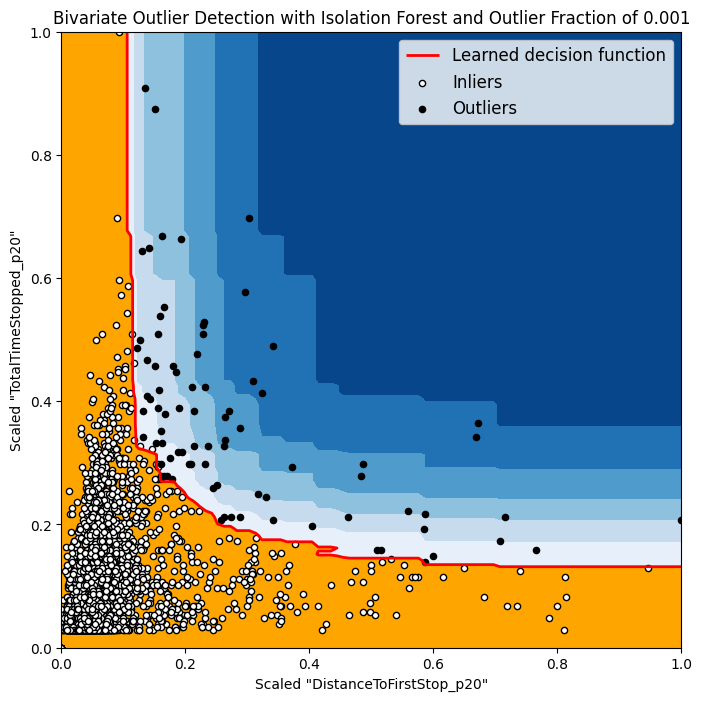

In [55]:
from pyod.models.iforest import IForest

SEED = 42


targets = ["DistanceToFirstStop_p20", "TotalTimeStopped_p20"]
outliers_fraction = 0.001

scaled_X, dataframe = scale_min_max(dataframe=subtrain, columns=targets)

clf = IForest(contamination=outliers_fraction, random_state=SEED)
clf.fit(scaled_X)
scores_pred = clf.decision_function(scaled_X) * -1
y_pred = clf.predict(scaled_X)
n_inliers = len(y_pred) - np.count_nonzero(y_pred)
n_outliers = np.count_nonzero(y_pred == 1)
print("[INFO] Outliers: ", n_outliers, " Inliers: ", n_inliers)

detections = detect_outliers(
    clf=clf,
    y_pred=y_pred,
    scores_pred=scores_pred,
    dataframe=dataframe,
    columns=targets,
    title=f"Bivariate Outlier Detection with Isolation Forest and Outlier Fraction of {outliers_fraction}",
    outliers_fraction=outliers_fraction,
)

[INFO] Outliers:  74  Inliers:  85564


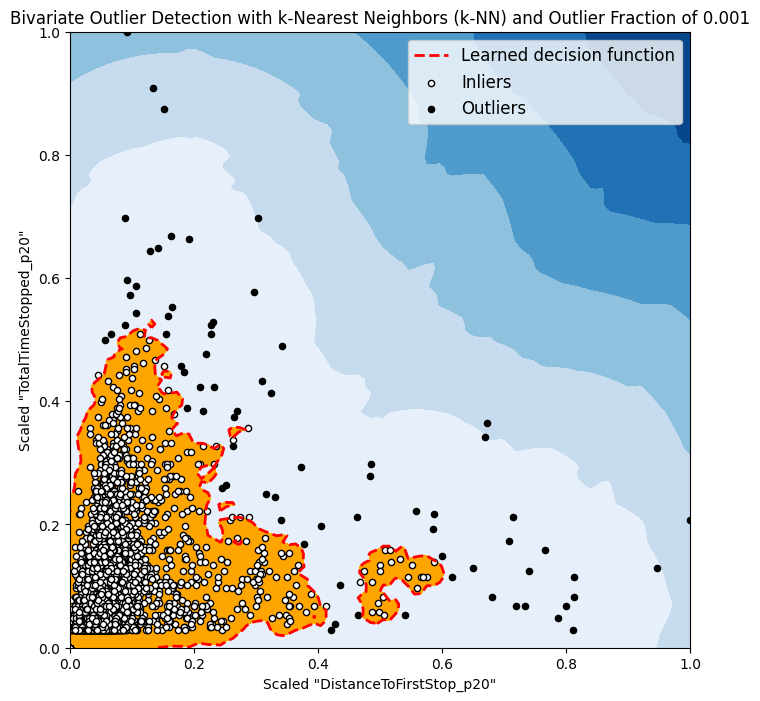

In [56]:
from pyod.models.knn import KNN


targets = ["DistanceToFirstStop_p20", "TotalTimeStopped_p20"]
outliers_fraction = 0.001

scaled_X, dataframe = scale_min_max(dataframe=subtrain, columns=targets)

clf = KNN(contamination=outliers_fraction)
clf.fit(scaled_X)
scores_pred = clf.decision_function(scaled_X) * -1
y_pred = clf.predict(scaled_X)
n_inliers = len(y_pred) - np.count_nonzero(y_pred)
n_outliers = np.count_nonzero(y_pred == 1)
print("[INFO] Outliers: ", n_outliers, " Inliers: ", n_inliers)

detections = detect_outliers(
    clf=clf,
    y_pred=y_pred,
    scores_pred=scores_pred,
    dataframe=dataframe,
    columns=targets,
    title=f"Bivariate Outlier Detection with k-Nearest Neighbors (k-NN) and Outlier Fraction of {outliers_fraction}",
    outliers_fraction=outliers_fraction,
)

[INFO] Outliers:  8  Inliers:  85630


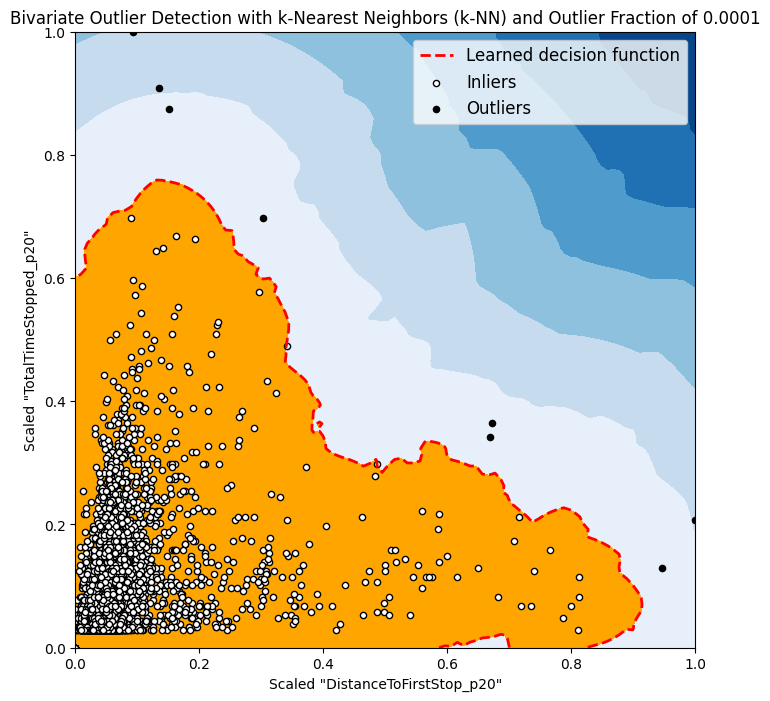

In [57]:
targets = ["DistanceToFirstStop_p20", "TotalTimeStopped_p20"]
outliers_fraction = 0.0001

scaled_X, dataframe = scale_min_max(dataframe=subtrain, columns=targets)

clf = KNN(contamination=outliers_fraction)
clf.fit(scaled_X)
scores_pred = clf.decision_function(scaled_X) * -1
y_pred = clf.predict(scaled_X)
n_inliers = len(y_pred) - np.count_nonzero(y_pred)
n_outliers = np.count_nonzero(y_pred == 1)
print("[INFO] Outliers: ", n_outliers, " Inliers: ", n_inliers)

detections = detect_outliers(
    clf=clf,
    y_pred=y_pred,
    scores_pred=scores_pred,
    dataframe=dataframe,
    columns=targets,
    title=f"Bivariate Outlier Detection with k-Nearest Neighbors (k-NN) and Outlier Fraction of {outliers_fraction}",
    outliers_fraction=outliers_fraction,
)

In [58]:
with pd.option_context('display.max_columns', None):
    display(detections[detections['outlier'] == 1])

,RowId,IntersectionId,Latitude,Longitude,EntryStreetName,ExitStreetName,EntryHeading,ExitHeading,Hour,Weekend,Month,Path,TotalTimeStopped_p20,TotalTimeStopped_p40,TotalTimeStopped_p50,TotalTimeStopped_p60,TotalTimeStopped_p80,TimeFromFirstStop_p20,TimeFromFirstStop_p40,TimeFromFirstStop_p50,TimeFromFirstStop_p60,TimeFromFirstStop_p80,DistanceToFirstStop_p20,DistanceToFirstStop_p40,DistanceToFirstStop_p50,DistanceToFirstStop_p60,DistanceToFirstStop_p80,City,city_intersec_id,scaled_DistanceToFirstStop_p20,scaled_TotalTimeStopped_p20,outlier
29951,2083957,35,42.271528,-71.172645,Veterans Of Foreign Wars Parkway,Veterans Of Foreign Wars Parkway,SE,SE,15,0,12,Veterans Of Foreign Wars Parkway_SE_Veterans O...,71.0,113.0,125.0,139.0,187.0,159.0,207.0,238.0,275.0,301.0,756.8,826.1,903.5,954.4,1039.8,Boston,Boston_35,0.669438,0.341346,1
34105,2288785,710,41.807891,-87.723587,West 47th Street,West 47th Street,W,W,16,0,6,West 47th Street_W_West 47th Street_W,145.0,221.0,244.0,267.0,270.0,272.0,290.0,307.0,338.0,354.0,342.6,343.4,360.1,362.2,369.5,Chicago,Chicago_710,0.303052,0.697115,1
52879,2222404,997,42.334117,-71.104812,Francis Street,Tremont Street,SE,E,14,0,11,Francis Street_SE_Tremont Street_E,189.0,206.0,231.0,259.0,287.0,216.0,230.0,291.0,293.0,336.0,151.7,183.3,210.1,240.2,265.4,Boston,Boston_997,0.134188,0.908654,1
53200,2116066,246,42.272515,-71.069431,Washington Street,Washington Street,SE,E,17,0,7,Washington Street_SE_Washington Street_E,208.0,270.0,314.0,319.0,354.0,235.0,305.0,311.0,336.0,354.0,104.3,125.0,135.4,137.9,141.2,Boston,Boston_246,0.092260,1.000000,1
55217,2741209,1809,39.988673,-75.187067,West Diamond Street,Diamond Drive,W,W,11,0,9,West Diamond Street_W_Diamond Drive_W,76.0,86.0,86.0,101.0,117.0,181.0,241.0,241.0,249.0,290.0,760.5,1151.0,1151.0,1159.0,1726.0,Philadelphia,Philadelphia_1809,0.672711,0.365385,1
59982,2471041,389,39.995062,-75.163194,West Sedgley Avenue,West Sedgley Avenue,E,E,22,0,7,West Sedgley Avenue_E_West Sedgley Avenue_E,27.0,39.0,39.0,56.0,61.0,137.0,140.0,140.0,156.0,212.0,1070.4,1150.3,1150.3,1154.0,1515.9,Philadelphia,Philadelphia_389,0.946838,0.129808,1
67990,1979103,164,33.753517,-84.363865,Dekalb Avenue Northeast,Dekalb Avenue Northeast,W,W,17,0,8,Dekalb Avenue Northeast_W_Dekalb Avenue Northe...,182.0,220.0,310.0,312.0,348.0,233.0,312.0,343.0,346.0,355.0,171.0,237.8,242.3,243.5,356.0,Atlanta,Atlanta_164,0.151261,0.875000,1
78444,2471166,389,39.995062,-75.163194,West Sedgley Avenue,West Lehigh Avenue,E,E,18,0,9,West Sedgley Avenue_E_West Lehigh Avenue_E,43.0,54.0,54.0,60.0,69.0,150.0,157.0,157.0,231.0,241.0,1130.5,1141.4,1141.4,1808.9,1898.1,Philadelphia,Philadelphia_389,1.000000,0.206731,1


**Imputación**

Por varias razones, muchos conjuntos de datos del mundo real contienen valores faltantes, a menudo codificados como espacios en blanco, NaN u otros marcadores de posición (e.g. -9999), y la mayoría de los algoritmos de aprendizaje automático no pueden funcionar con características faltantes, así que vamos a crear algunas funciones para solucionarlos.

Una estrategia básica para lidiar con valores faltantes en conjuntos de datos incompletos, es descartar filas y/o columnas enteras que contienen valores faltantes. Sin embargo, esto tiene el precio de perder datos que pueden ser valiosos (aunque estén incompletos).

Una mejor estrategia es imputar los valores faltantes, es decir, inferirlos de la parte conocida de los datos. Véase la entrada del glosario sobre imputación. A continuacion, verificaremos si existen valores faltantes en neustro *dataset* y para ello tendremos que instalar las dependencias `missingno` y `prettytable`.

In [59]:
!pip install -U missingno
!pip install -U prettytable

In [60]:
from typing import NoReturn

from prettytable import PrettyTable


def quantify_missing(dataframe: pd.DataFrame, tol: float) -> NoReturn:
    missing_value = dataframe.isnull().mean() * 100
    missing_value_dict = missing_value.to_dict()
    missing_percentage = missing_value > tol
    missing_percentage = missing_percentage.to_dict()
    count = 0
    table = PrettyTable(
        ['Feature', 'Missing Value Percentage'], float_format='3.2'
    )
    features = []
    for key in missing_percentage:
        if missing_percentage[key]:
            table.add_row([key, np.round(missing_value_dict[key], 8)])
            count = count + 1
            features.append(key)
    print(table)
    print('Total quantified features:', count)

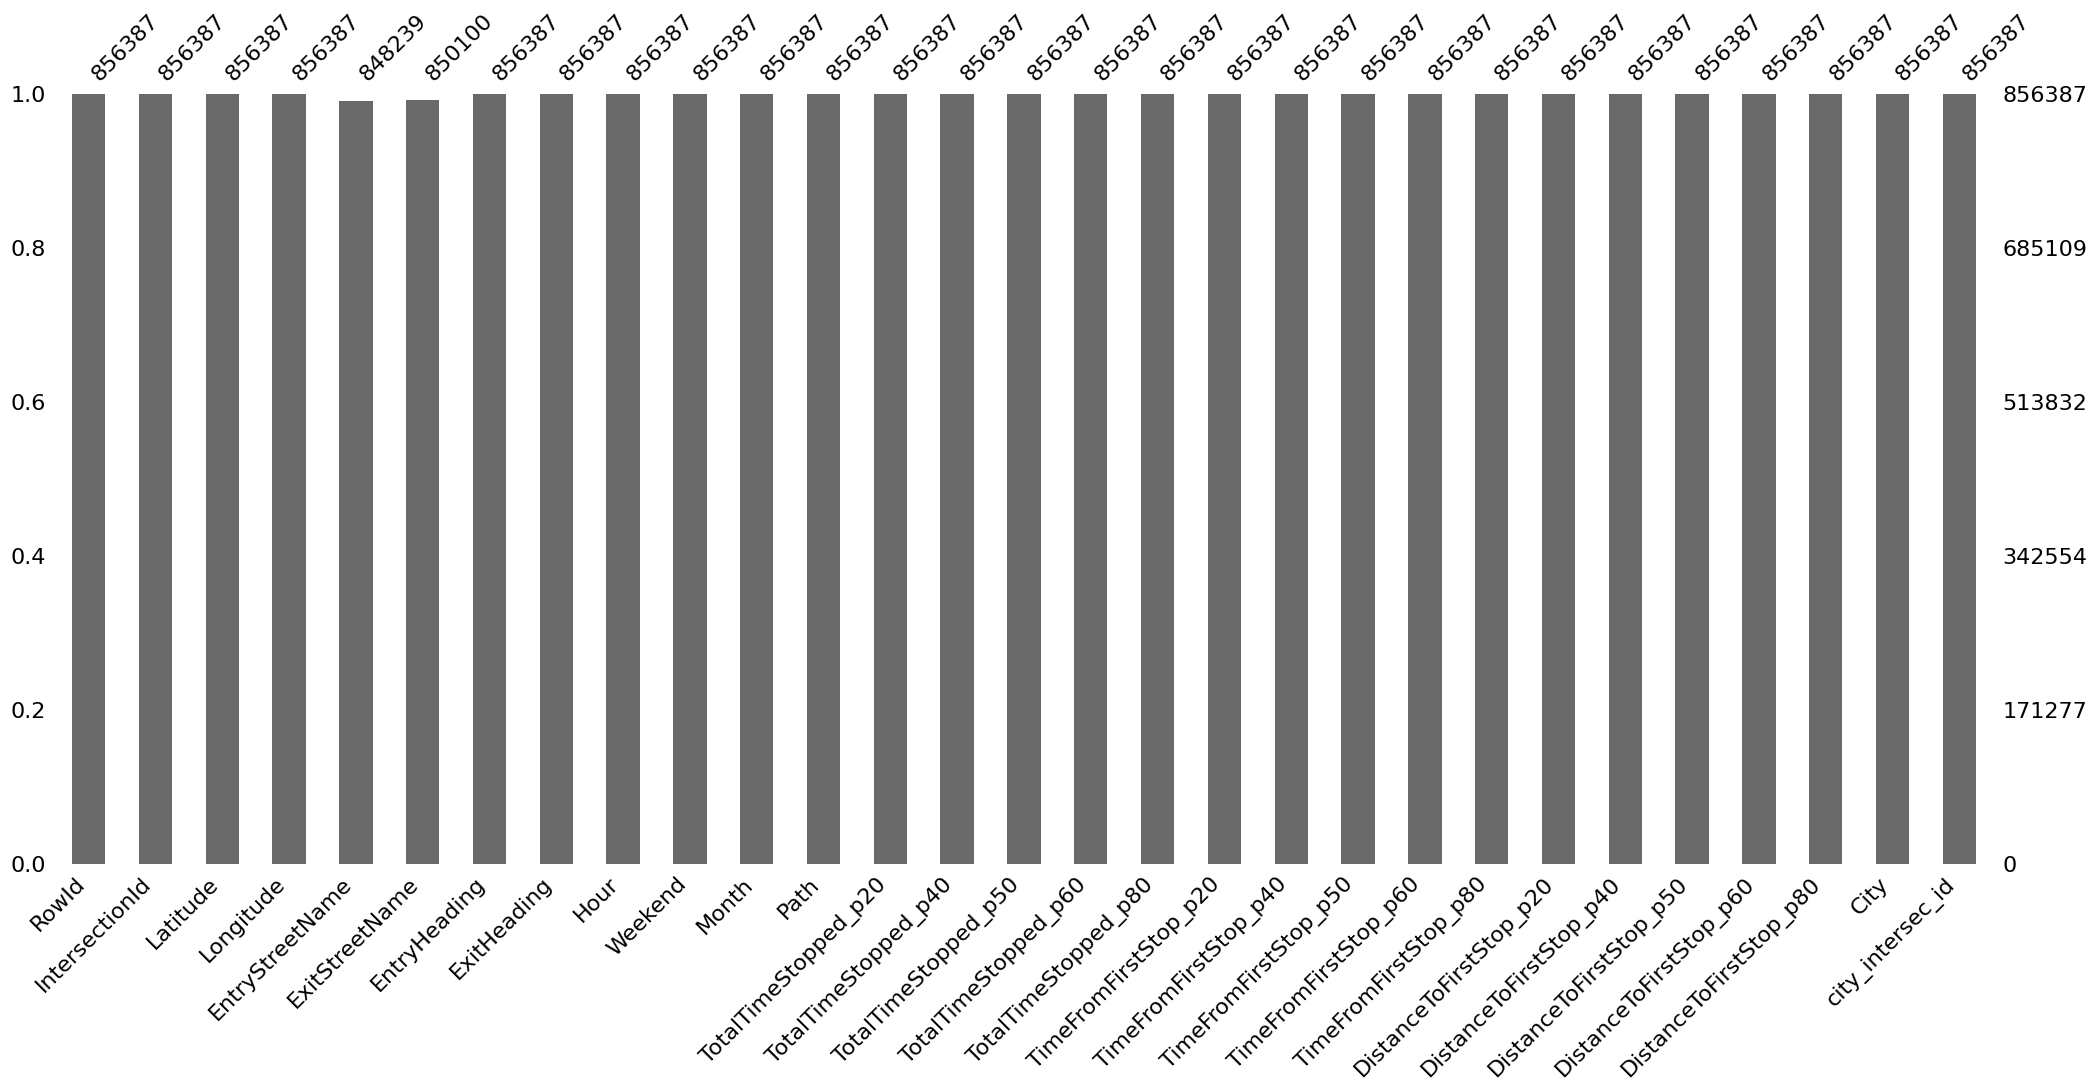

In [61]:
import missingno as msno


msno.bar(train)
plt.show()

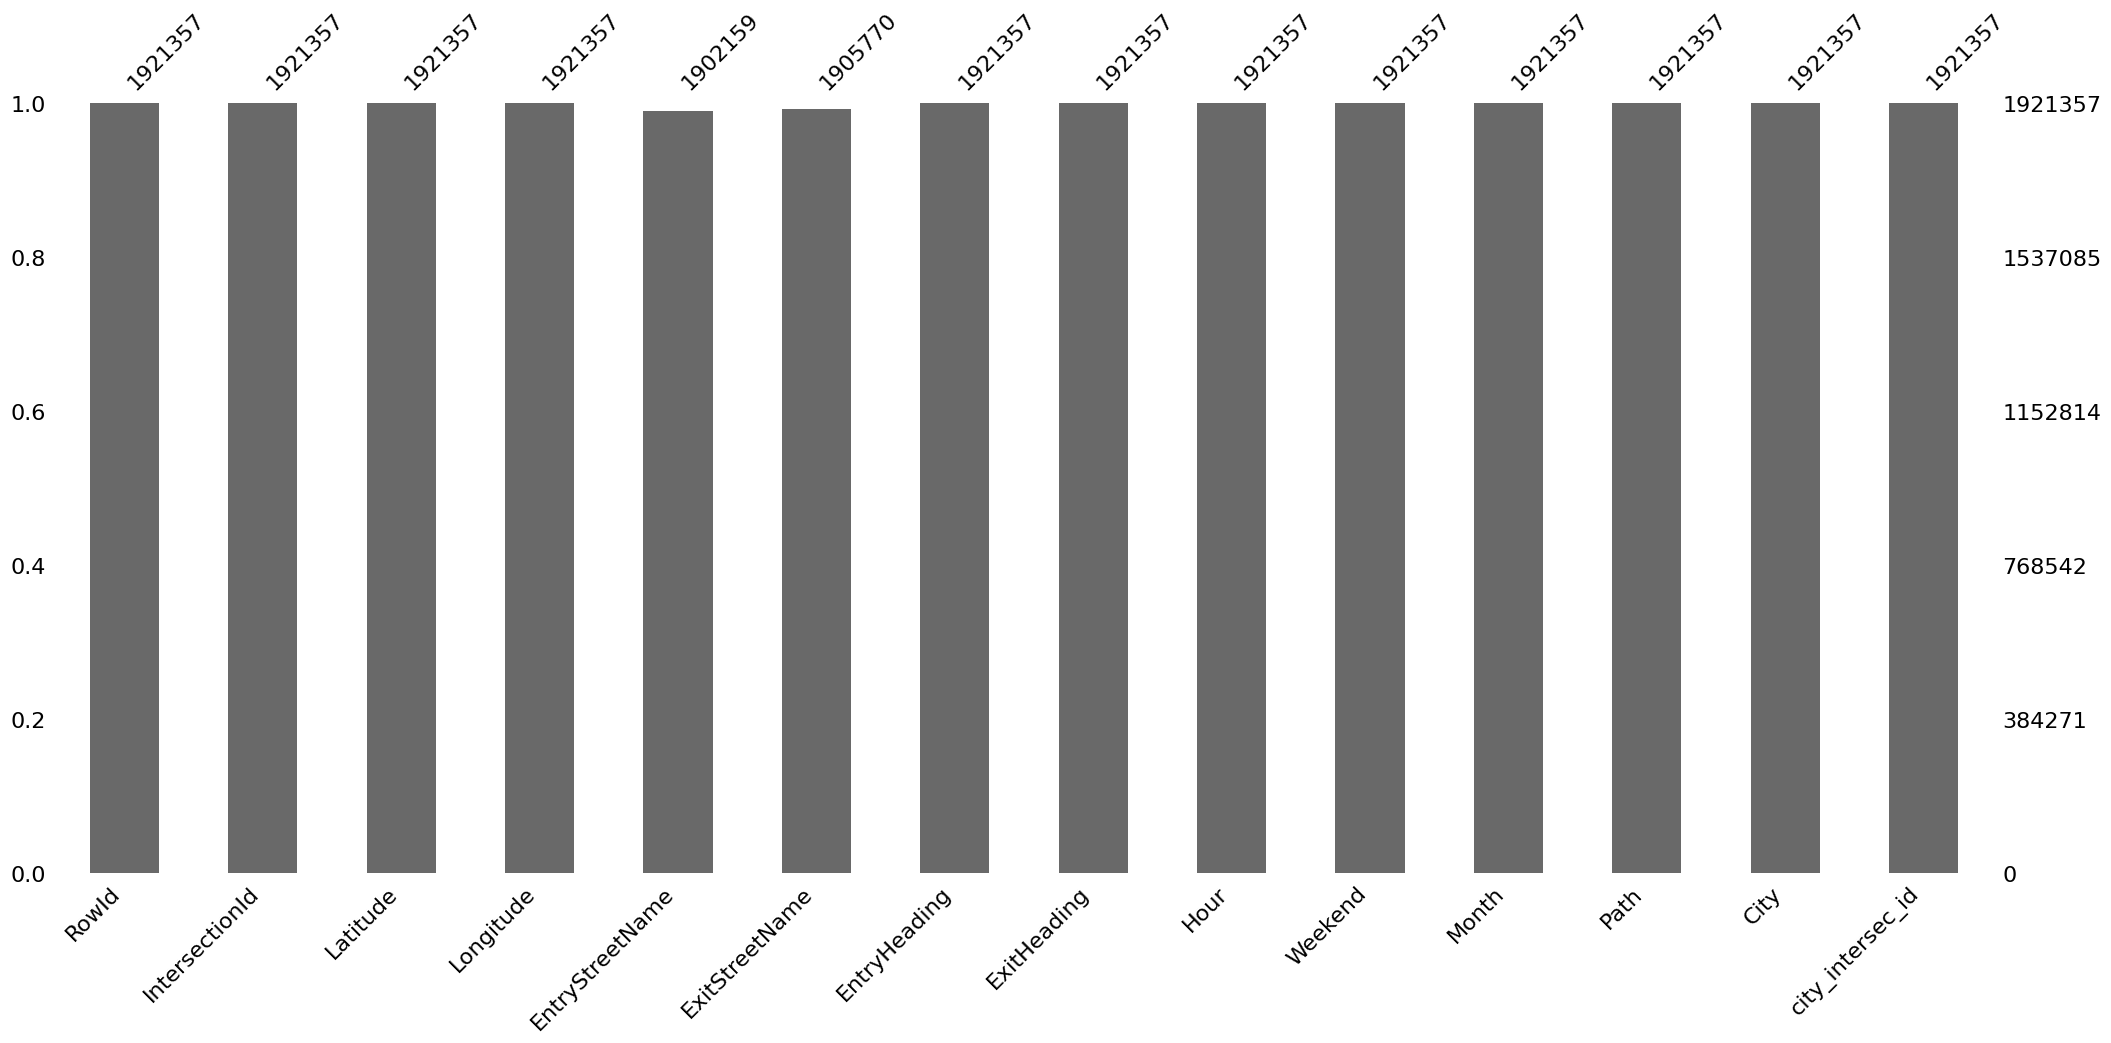

In [62]:
msno.bar(test)
plt.show()

Los gráficos de barras cuentan el total de valor ***NO*** faltantes que tienen cada uno de las columnas de los *datasets*. Vemos entonces que 856387 y 1921357, corresponden al total de instancias de los conjuntos de entrenamiento y por fuera muestra, respectivamente. Cualquier número inferior a este, como es el caso de las columnas `EntryStreetName` con 848239 en *train* y 1902159 en *test*, y `ExitStreetName` con 850100 en *train* y  1905770 en *test*, exponen la presencia de valores faltantes.<br><br>

<div class="remark">
<b>Tip: </b>La parte más importante en el proceso de imputación, más que el proceso mismo, es en decidir si es "correcta" la proposición de algún mecanismo de imputación para una variable en especifica y si este proceso agrega valor a la futura etapa de modelamiento.
</div><br><br>

<div class="warn">
<b>Advertencia: </b>No considerar la selección de los mecanismos de imputación en función de la cantidad de valores faltantes, tanto en entrenamiento como en inferencia, puede traer consigo degradaciones en la predicción de los modelos.
</div>

A pesar que los dos últimos gráficos evidencia que nuestros *datasets* de entrenamiento y *test* no tienen valores faltantes, simularemos esta condición a partir de una población aleatoria del 10% del total de muestras del conjunto de entrenamiento. Posteriormente, introduciremos valores faltantes de forma aleatoria en todas las columnas de la selección.

In [63]:
train[train['EntryStreetName'].isnull() | train['ExitStreetName'].isnull()]

,RowId,IntersectionId,Latitude,Longitude,EntryStreetName,ExitStreetName,EntryHeading,ExitHeading,Hour,Weekend,...,TimeFromFirstStop_p50,TimeFromFirstStop_p60,TimeFromFirstStop_p80,DistanceToFirstStop_p20,DistanceToFirstStop_p40,DistanceToFirstStop_p50,DistanceToFirstStop_p60,DistanceToFirstStop_p80,City,city_intersec_id
381,1921738,0,33.791659,-84.430032,NaN,Marietta Boulevard Northwest,NE,SE,4,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Atlanta,Atlanta_0
7135,1928492,10,33.652866,-84.397621,NaN,Porsche Avenue,N,W,6,0,...,16.0,28.0,30.0,0.0,50.8,54.9,55.9,57.0,Atlanta,Atlanta_10
7138,1928495,10,33.652866,-84.397621,Porsche Avenue,NaN,W,S,8,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Atlanta,Atlanta_10
7140,1928497,10,33.652866,-84.397621,Porsche Avenue,NaN,E,S,9,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Atlanta,Atlanta_10
7141,1928498,10,33.652866,-84.397621,Porsche Avenue,NaN,E,S,10,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Atlanta,Atlanta_10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
829869,2751226,1865,40.021833,-75.040124,State Road,NaN,W,W,7,0,...,0.0,0.0,38.0,0.0,0.0,0.0,0.0,72.4,Philadelphia,Philadelphia_1865
829871,2751228,1865,40.021833,-75.040124,State Road,NaN,W,W,8,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Philadelphia,Philadelphia_1865
829879,2751236,1865,40.021833,-75.040124,State Road,NaN,W,W,16,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Philadelphia,Philadelphia_1865
848575,2769932,1951,39.940322,-75.201374,NaN,Grays Ferry Avenue,N,E,8,0,...,11.0,18.0,33.0,0.0,0.0,20.4,23.6,39.9,Philadelphia,Philadelphia_1951


En nuestro caso, imputar las variables `EntryStreetName` y `ExitStreetName` no es viable mediante mecanismo de imputación simple (valor promedio, la mediana o la moda), pues al tratarse de nombres de calles, cualquiera de estos altera la variable con información que no será correcta. El mecanismo más adecuado sería consultar en una base de datos externa el nombre de las calles a partir de las variables de latitud y longitud. No obstante, estas dos columnas terminan siendo variables de tipo "identificador" que restan generalización a los futuros modelos, de incluirse en el entrenamiento. Por consiguiente, se concluye que es un esfuerzo grande imputar `EntryStreetName` y `ExitStreetName` y que al mismo tiempo, según el planteamiento actual, no aportarán considerablemente a mejorar las capacidad predictivas del modelo, por lo que optamos por descartar estas dos columnas.

No obstante, a continuación planteamos un ejercicio de imputación, a manera de ejemplo:

In [64]:
mask = np.random.choice([False, True], size=subtrain.shape, p=[0.9, 0.1])
subtrain[mask] = np.nan
subtrain.reset_index(drop=True, inplace=True)

with pd.option_context('display.max_columns', None):
    display(subtrain)

,RowId,IntersectionId,Latitude,Longitude,EntryStreetName,ExitStreetName,EntryHeading,ExitHeading,Hour,Weekend,Month,Path,TotalTimeStopped_p20,TotalTimeStopped_p40,TotalTimeStopped_p50,TotalTimeStopped_p60,TotalTimeStopped_p80,TimeFromFirstStop_p20,TimeFromFirstStop_p40,TimeFromFirstStop_p50,TimeFromFirstStop_p60,TimeFromFirstStop_p80,DistanceToFirstStop_p20,DistanceToFirstStop_p40,DistanceToFirstStop_p50,DistanceToFirstStop_p60,DistanceToFirstStop_p80,City,city_intersec_id,scaled_DistanceToFirstStop_p20,scaled_TotalTimeStopped_p20
0,NaN,401.0,33.746900,-84.387708,Capitol Avenue Southeast,Capitol Avenue Southeast,S,S,21.0,0.0,11.0,Capitol Avenue Southeast_S_Capitol Avenue Sout...,0.0,0.0,7.0,25.0,38.0,0.0,0.0,15.0,32.0,47.0,0.0,0.0,NaN,68.3,87.7,Atlanta,Atlanta_401,NaN,0.000000
1,2197160.0,NaN,42.349570,-71.047193,Congress Street,Boston Wharf Road,SE,NE,8.0,0.0,8.0,Congress Street_SE_Boston Wharf Road_NE,0.0,17.0,18.0,21.0,NaN,0.0,29.0,39.0,43.0,90.0,0.0,48.3,51.2,68.1,91.1,Boston,<NA>,0.000000,0.000000
2,2147258.0,461.0,NaN,-71.061274,Albany Street,Albany Street,S,S,12.0,0.0,11.0,NaN,0.0,11.0,20.0,25.0,43.0,NaN,25.0,33.0,39.0,53.0,NaN,60.8,73.0,NaN,102.9,Boston,Boston_461,0.000000,NaN
3,2259516.0,64.0,41.927966,-87.706895,North Kedzie Boulevard,West Logan Boulevard,NE,E,15.0,0.0,NaN,North Kedzie Boulevard_NE_West Logan Boulevard_E,0.0,8.0,8.0,36.0,36.0,0.0,NaN,24.0,49.0,55.0,0.0,90.4,90.4,113.5,123.8,Chicago,Chicago_64,0.000000,0.000000
4,2082973.0,32.0,42.348575,-71.140150,Warren Street,Kelton Street,SE,SE,13.0,NaN,7.0,Warren Street_SE_Kelton Street_SE,19.0,40.0,52.0,66.0,74.0,32.0,55.0,66.0,79.0,89.0,82.3,94.3,100.3,108.2,NaN,Boston,Boston_32,0.072800,0.091346
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85633,2479561.0,426.0,40.022933,-75.148251,North Broad Street,North Broad Street,S,S,13.0,1.0,7.0,North Broad Street_S_North Broad Street_S,0.0,0.0,0.0,0.0,24.0,0.0,0.0,0.0,0.0,44.0,0.0,0.0,0.0,0.0,86.4,Philadelphia,Philadelphia_426,0.000000,0.000000
85634,NaN,930.0,39.961517,-75.151787,Spring Garden Street,North 8th Street,E,S,23.0,1.0,11.0,Spring Garden Street_E_North 8th Street_S,0.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Philadelphia,Philadelphia_930,0.000000,NaN
85635,NaN,737.0,39.948931,NaN,Baltimore Avenue,Baltimore Avenue,NaN,E,6.0,0.0,11.0,Baltimore Avenue_E_Baltimore Avenue_E,NaN,13.0,24.0,NaN,29.0,0.0,23.0,35.0,37.0,38.0,0.0,59.2,63.5,70.3,90.3,Philadelphia,Philadelphia_737,0.000000,0.000000
85636,2108454.0,203.0,42.374787,NaN,Frankfort Street,Cottage Street,S,E,22.0,0.0,8.0,Frankfort Street_S_Cottage Street_E,0.0,0.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,Boston,Boston_203,0.000000,0.000000


1. Generalmente, un *dataset* Puede corresponder a la combinación y unificación de diversas fuentes de datos. Por tal razón, los marcadores de datos faltantes pueden variar y necesitan ser normalizados y estandarizados. Por consiguiente, el proceso comienza normalizar y estandarizar los marcadores. Puede hacer uso de los metodos [`pandas.Series.replace()`](https://pandas.pydata.org/docs/reference/api/pandas.Series.replace.html) y [`pandas.DataFrame.replace()`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.replace.html) para efectuar esta acción. En nuestro caso, por pasos previos se evidencia que los valores faltantes estan definidos por el marcador [`np.nan`](https://numpy.org/doc/stable/reference/generated/numpy.isnan.html).

2. Una vez normalizados los marcadores de datos faltantes, continuamos determinando la cantidad de valores faltantes presentes en el dataset. PAra ello, utilizamos nuevamente el gráfico de barras que cuenta los valores ***NO*** faltantes en el *dataset*. La diferencia de cada uno de estos valores con respecto al total de instancias, determinará la cantidad de valores faltantes para cada columna.<br><br>

<div class="remark">
<b>Tip:</b> Tener una visión porcentual de la cantidad de valores faltantes con respecto al total de entradas en el <i>dataset</i>, clarifica la toma de decisiones en cuanto a la imputación.
</div>

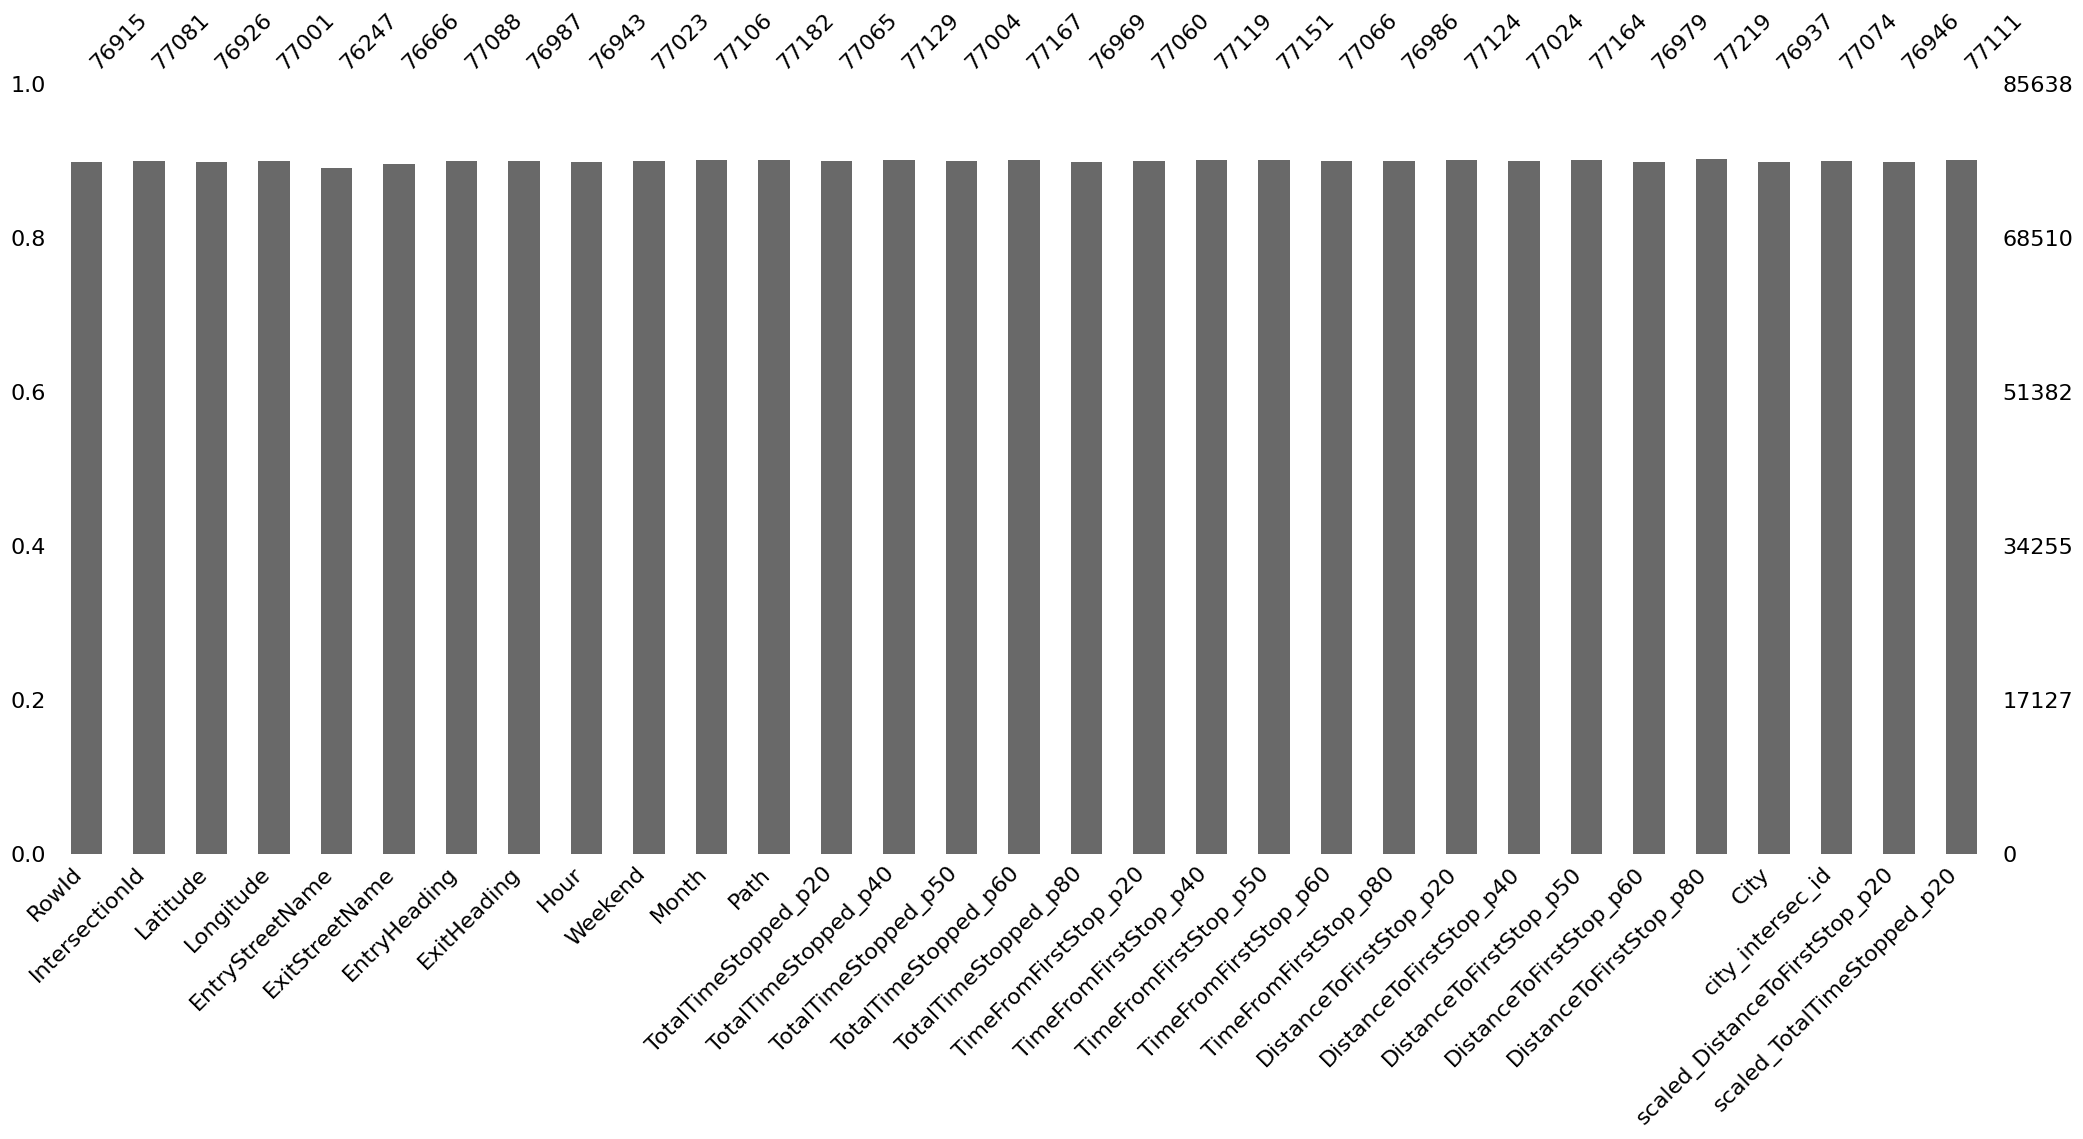

In [65]:
msno.bar(subtrain)
plt.show()

In [66]:
quantify_missing(dataframe=subtrain, tol=0.0)

+--------------------------------+--------------------------+
|            Feature             | Missing Value Percentage |
+--------------------------------+--------------------------+
|             RowId              |          10.19           |
|         IntersectionId         |           9.99           |
|            Latitude            |          10.17           |
|           Longitude            |          10.09           |
|        EntryStreetName         |          10.97           |
|         ExitStreetName         |          10.48           |
|          EntryHeading          |           9.98           |
|          ExitHeading           |          10.10           |
|              Hour              |          10.15           |
|            Weekend             |          10.06           |
|             Month              |           9.96           |
|              Path              |           9.87           |
|      TotalTimeStopped_p20      |          10.01           |
|      T

2. Una vez se hayan definido los porcentajes de valores faltantes, es necesario determinar el patrón o mecanismo de datos faltantes²³, por el cual se produjo la ausencia de los valores. A pesar que esta determinación se basa meramente en la correlación de los valores faltantes, es importante resaltar que aunque la correlación no implica causalidad, hacerse una idea de la fuente, permite decidir los mecanismos de imputación mas adecuados.<br><br>

---

²³ <a href="https://en.wikipedia.org/wiki/Missing_data">Missing data - Types</a>.

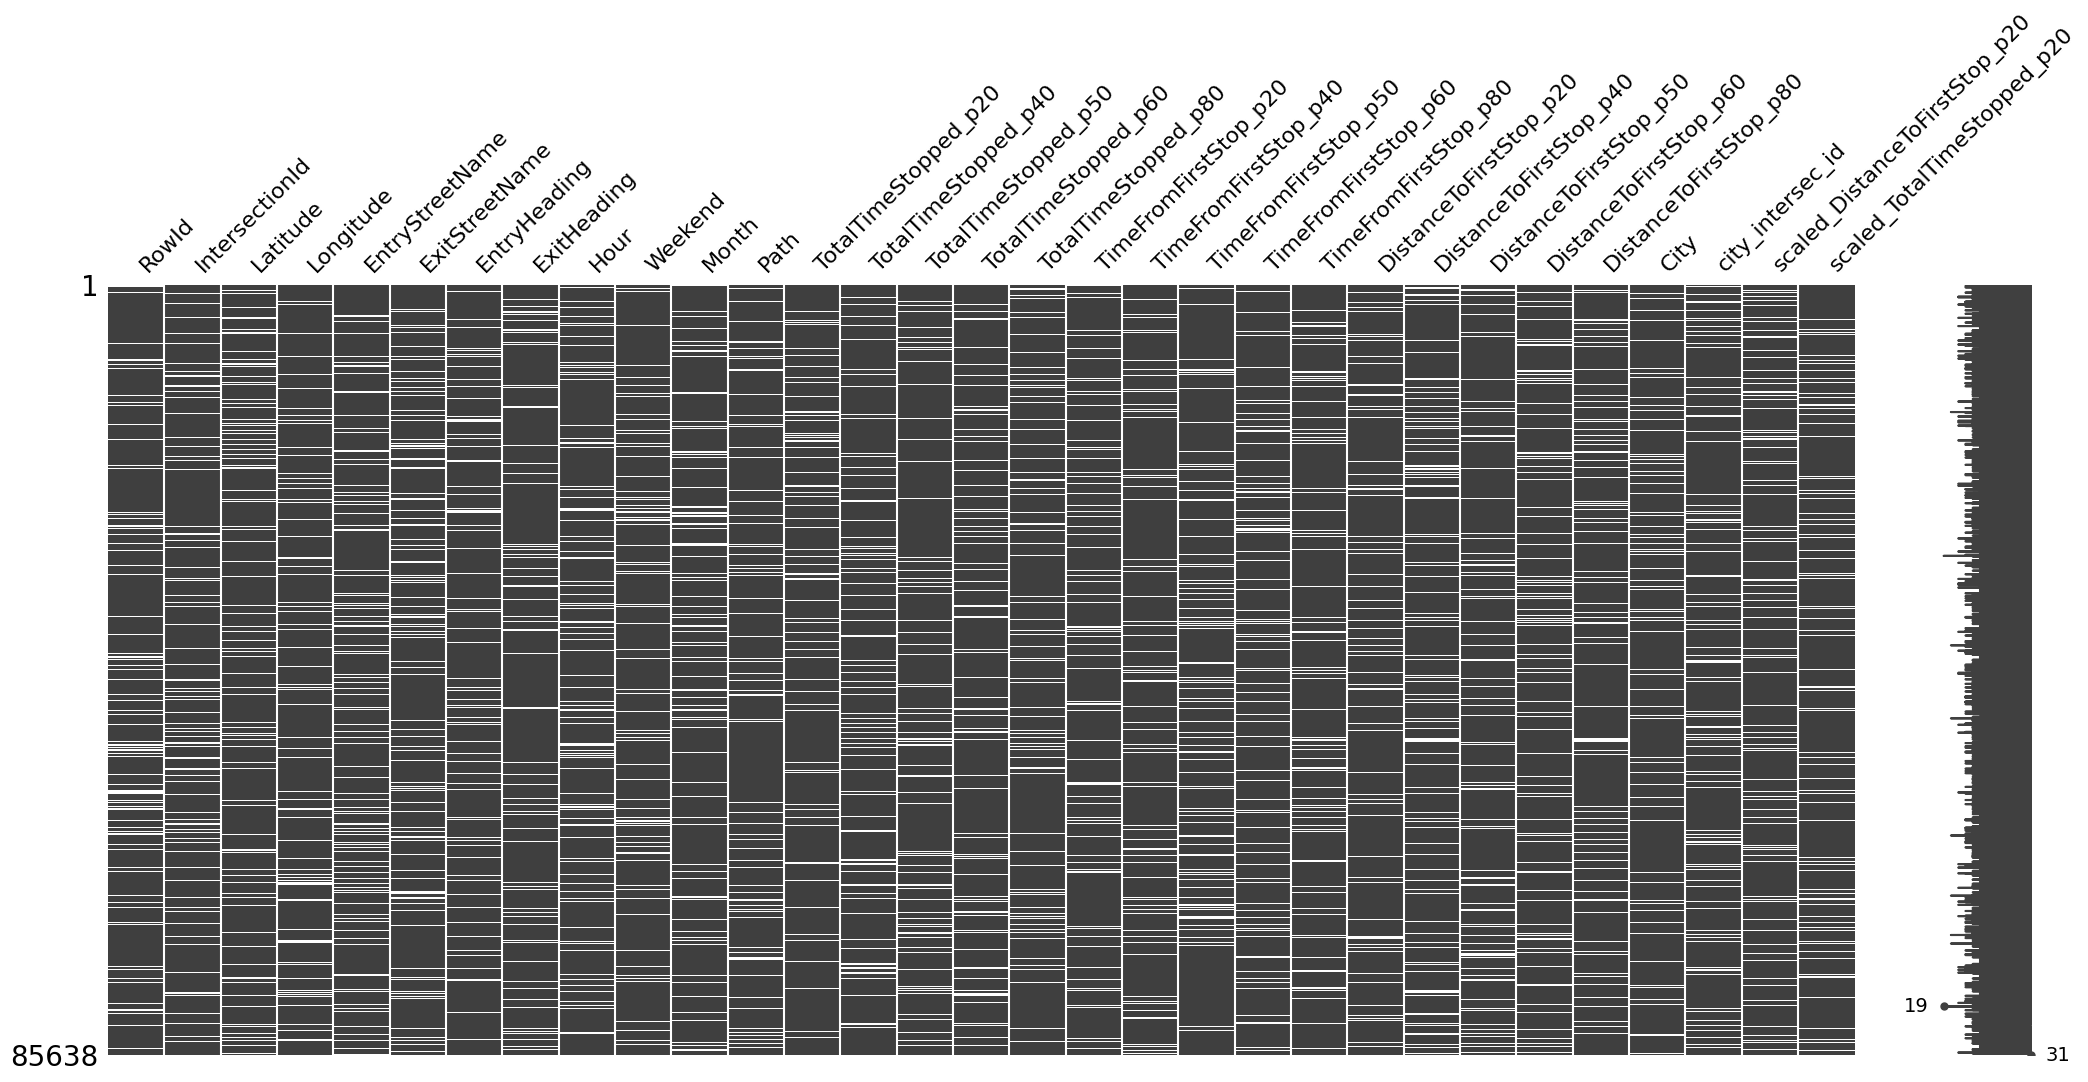

In [67]:
msno.matrix(subtrain)
plt.show()

Cada fragmento en las columnas de color blanco, corresponde a la visualizacion de datos faltantes. En un escenario  de patrones continuos de valores faltantes en `msno.matrix()`, estos pueden estar relacionados con inconsistencias en los procesos de recolección y adquisición de los datos. En nuestro caso, tales patrones parecen estar representados por la aleatoriedad, correspondiendo a la forma con la que los generamos.

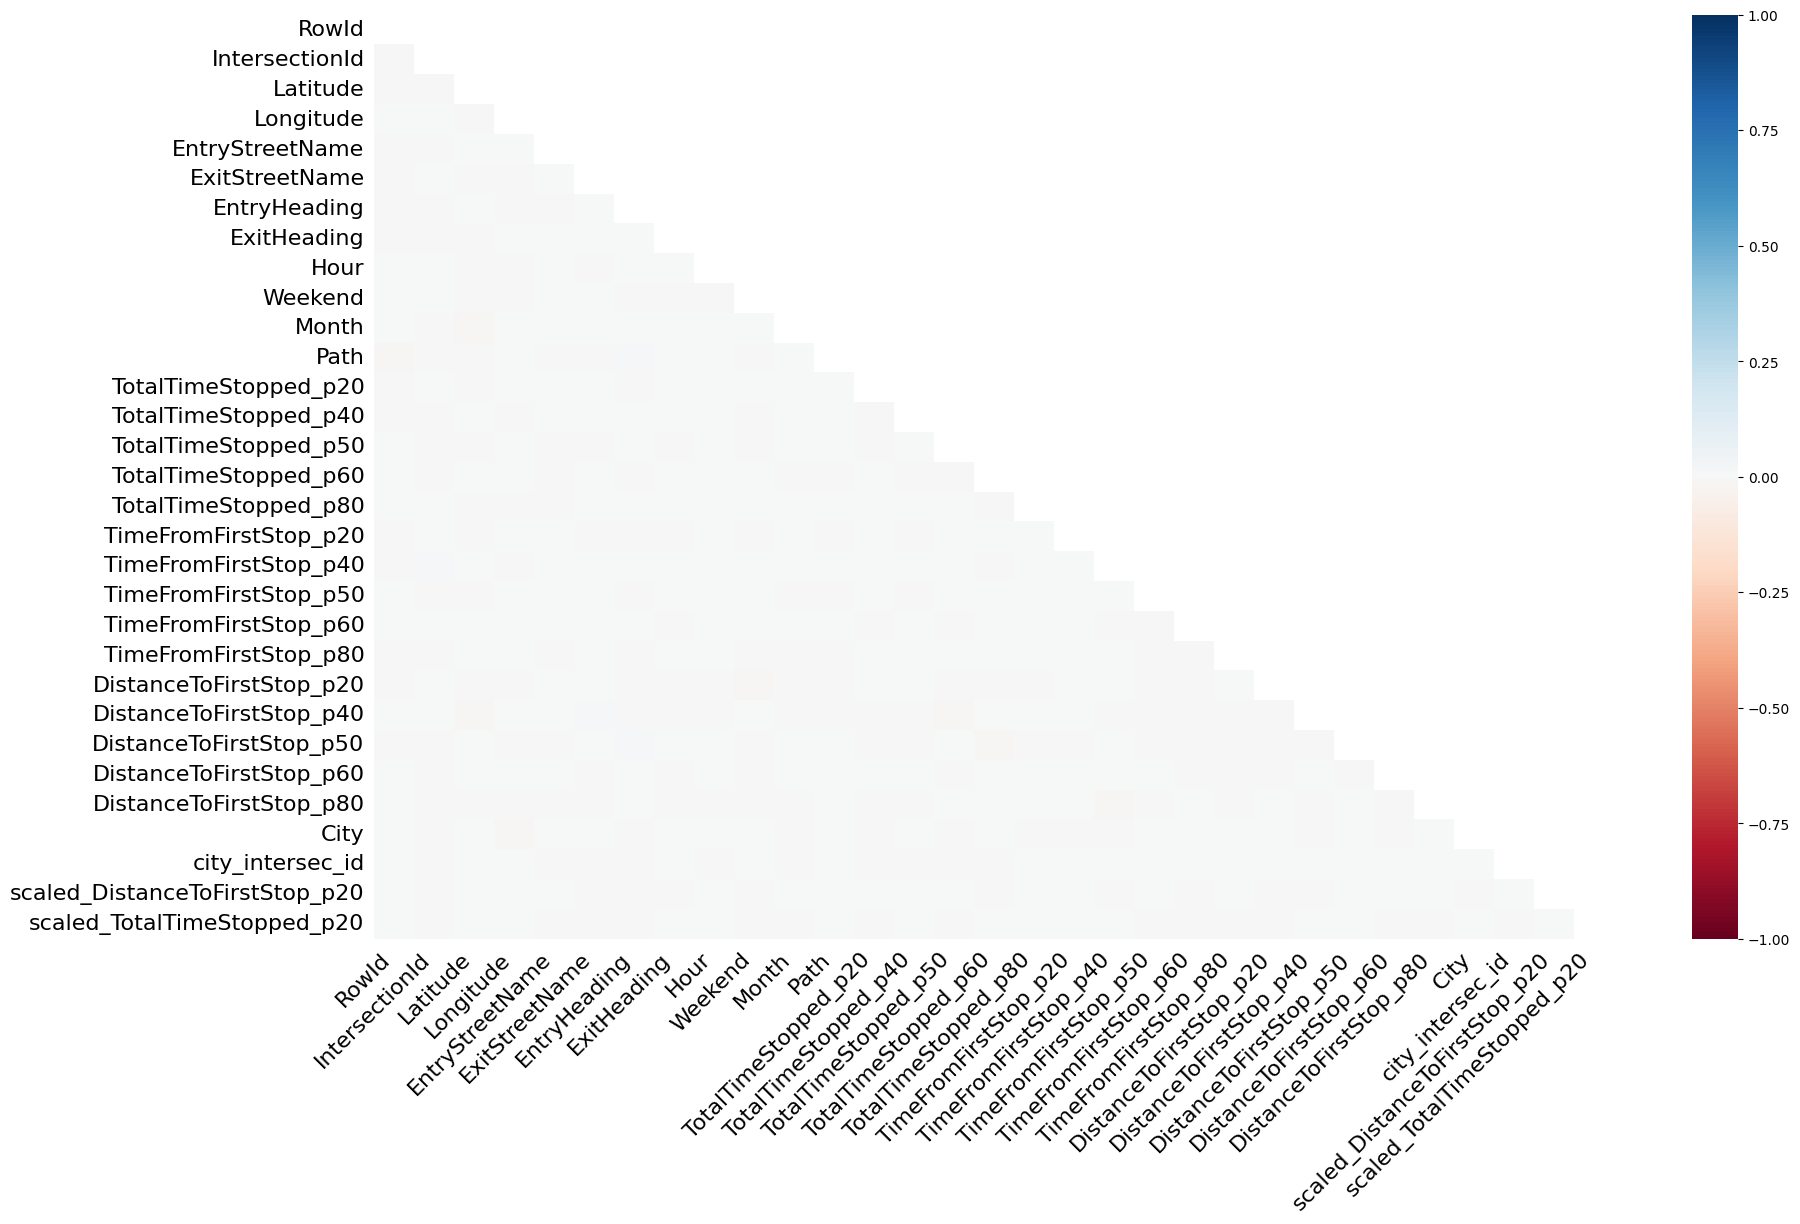

In [68]:
msno.heatmap(subtrain)
plt.show()

Como podemos verificar en la anterior matriz de correlación, no existe una correlación directa entre los valores faltantes de las diferentes columnas. Esto es esperado en los casos en los que los valores faltantes corresponden a un mecanismo aleatorio.

A pesar de no que no existe estándar en cuanto al manejo de datos faltantes y que cualquier esquema además de ser relativo, parte de la heurística y el componente empírico del problema, a continuación se intentan listar algunas acciones prácticas en función de los porcentajes y de los patrones de datos faltantes:

- Se recomienda eliminar una columna en particular si la cantidad de valores faltantes en los datos es superior al 30% (alto porcentaje de datos faltantes).
- En escenarios de grandes volúmenes de datos, es posible jugar con la eliminación de filas que contienen valores nulos. Aunque, no se recomienda si el porcentaje de valores faltantes en el conjunto de datos es superior al 30%.
- En el rango de 0 a 5% de datos faltantes en volúmenes medios de datos, puede recurrir a la eliminación de filas.
- Hasta aproximadamente un 15%,  es posible tratar los datos faltantes utilizando técnicas de imputación simple.
- Para el rango de 15% a 30% se recomienda utilizar métodos de imputación multiple²⁵ más robustos como lo son el *Multiple Imputation by Chained Equations* (MICE)²⁶ apto para cualquier volumen o el método *Multiple Imputation with Denoising Autoencoders* (MIDAS)²⁷ recomendable para grandes volúmenes de datos.<br><br>

4. Una vez ya aclarados los porcentajes de datos faltantes y detectados sus posibles patrones, se procede a imputar. El paquete de python [scikit-learn](https://scikit-learn.org/stable/) ofrece un sin fin de herramientas para las diferentes etapas del ciclo de vida de ciencia de datos y la imputación no es la excepción.

---

²⁴ <a href="https://www.sciencedirect.com/topics/mathematics/imputation-method">Imputation Method</a>.

²⁵ <a href="https://en.wikipedia.org/wiki/Imputation_(statistics)">Imputation (statistics) - Multiple imputation</a>.

²⁶ Wulff, J. N., & Jeppesen, L. E. (2017). <a href="https://vbn.aau.dk/ws/files/257318283/ejbrm_volume15_issue1_article450.ptrain">Multiple imputation by chained equations in praxis: guidelines and review. </a> Electronic Journal of Business Research Methods, 15(1), 41-56.

²⁷ Lall, R., & Robinson, T. (2022). <a href="https://eprints.lse.ac.uk/108170/1/Lall_Robinson_PA_Forthcoming.ptrain">The MIDAS touch: Accurate and scalable missing-data imputation with deep learning.</a> Political Analysis, 30(2), 179-196.

In [69]:
from sklearn.impute import SimpleImputer


numerical = subtrain.select_dtypes("number")
num_cols = numerical.columns
categorical = subtrain.select_dtypes("object")
cat_cols = categorical.columns

imp_mean = SimpleImputer(missing_values=np.nan, strategy='mean')
imp_mean.fit(numerical.values)
numerical = pd.DataFrame(data=imp_mean.transform(numerical), columns=num_cols)

imp_mode = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
imp_mode.fit(categorical)
categorical = pd.DataFrame(data=imp_mode.transform(categorical), columns=cat_cols)

imputed_values = pd.concat([numerical, categorical], axis=1)

with pd.option_context('display.max_columns', None):
    display(imputed_values)

/Users/joefaver/anaconda3/envs/pbs/lib/python3.9/site-packages/sklearn/base.py:443: UserWarning:

X has feature names, but SimpleImputer was fitted without feature names



,RowId,IntersectionId,Latitude,Longitude,Hour,Weekend,Month,TotalTimeStopped_p20,TotalTimeStopped_p40,TotalTimeStopped_p50,TotalTimeStopped_p60,TotalTimeStopped_p80,TimeFromFirstStop_p20,TimeFromFirstStop_p40,TimeFromFirstStop_p50,TimeFromFirstStop_p60,TimeFromFirstStop_p80,DistanceToFirstStop_p20,DistanceToFirstStop_p40,DistanceToFirstStop_p50,DistanceToFirstStop_p60,DistanceToFirstStop_p80,scaled_DistanceToFirstStop_p20,scaled_TotalTimeStopped_p20,EntryStreetName,ExitStreetName,EntryHeading,ExitHeading,Path,City
0,2.350024e+06,401.000000,33.746900,-84.387708,21.0,0.000000,11.000000,0.000000,0.000000,7.0000,25.000000,38.000000,0.000000,0.000000,15.0,32.0,47.0,0.000000,0.000000,28.408977,68.300000,87.700000,0.005935,0.000000,Capitol Avenue Southeast,Capitol Avenue Southeast,S,S,Capitol Avenue Southeast_S_Capitol Avenue Sout...,Atlanta
1,2.197160e+06,832.793205,42.349570,-71.047193,8.0,0.000000,8.000000,0.000000,17.000000,18.0000,21.000000,22.884044,0.000000,29.000000,39.0,43.0,90.0,0.000000,48.300000,51.200000,68.100000,91.100000,0.000000,0.000000,Congress Street,Boston Wharf Road,SE,NE,Congress Street_SE_Boston Wharf Road_NE,Boston
2,2.147258e+06,461.000000,39.624471,-71.061274,12.0,0.000000,11.000000,0.000000,11.000000,20.0000,25.000000,43.000000,3.180249,25.000000,33.0,39.0,53.0,6.655872,60.800000,73.000000,43.804873,102.900000,0.000000,0.008389,Albany Street,Albany Street,S,S,North Broad Street_N_North Broad Street_N,Boston
3,2.259516e+06,64.000000,41.927966,-87.706895,15.0,0.000000,9.104544,0.000000,8.000000,8.0000,36.000000,36.000000,0.000000,9.120904,24.0,49.0,55.0,0.000000,90.400000,90.400000,113.500000,123.800000,0.000000,0.000000,North Kedzie Boulevard,West Logan Boulevard,NE,E,North Kedzie Boulevard_NE_West Logan Boulevard_E,Chicago
4,2.082973e+06,32.000000,42.348575,-71.140150,13.0,0.280579,7.000000,19.000000,40.000000,52.0000,66.000000,74.000000,32.000000,55.000000,66.0,79.0,89.0,82.300000,94.300000,100.300000,108.200000,83.549523,0.072800,0.091346,Warren Street,Kelton Street,SE,SE,Warren Street_SE_Kelton Street_SE,Boston
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85633,2.479561e+06,426.000000,40.022933,-75.148251,13.0,1.000000,7.000000,0.000000,0.000000,0.0000,0.000000,24.000000,0.000000,0.000000,0.0,0.0,44.0,0.000000,0.000000,0.000000,0.000000,86.400000,0.000000,0.000000,North Broad Street,North Broad Street,S,S,North Broad Street_S_North Broad Street_S,Philadelphia
85634,2.350024e+06,930.000000,39.961517,-75.151787,23.0,1.000000,11.000000,0.000000,5.412802,0.0000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.008389,Spring Garden Street,North 8th Street,E,S,Spring Garden Street_E_North 8th Street_S,Philadelphia
85635,2.350024e+06,737.000000,39.948931,-77.904975,6.0,0.000000,11.000000,1.757919,13.000000,24.0000,11.913681,29.000000,0.000000,23.000000,35.0,37.0,38.0,0.000000,59.200000,63.500000,70.300000,90.300000,0.000000,0.000000,Baltimore Avenue,Baltimore Avenue,E,E,Baltimore Avenue_E_Baltimore Avenue_E,Philadelphia
85636,2.108454e+06,203.000000,42.374787,-77.904975,22.0,0.000000,8.000000,0.000000,0.000000,7.7333,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,83.549523,0.000000,0.000000,Frankfort Street,Cottage Street,S,E,Frankfort Street_S_Cottage Street_E,Boston


Entre las estrategias de imputación simple, para este ejercicio se escogió la imputación por el valor promedio (`strategy='mean'`) para las variables numéricas y por el valor más frecuente o la moda (`strategy='most_frequent'`) para las variables categóricas. Finalmente, podemos verificar el resulta visualizando nuevamente el conteo de los valores **NO** faltantes.

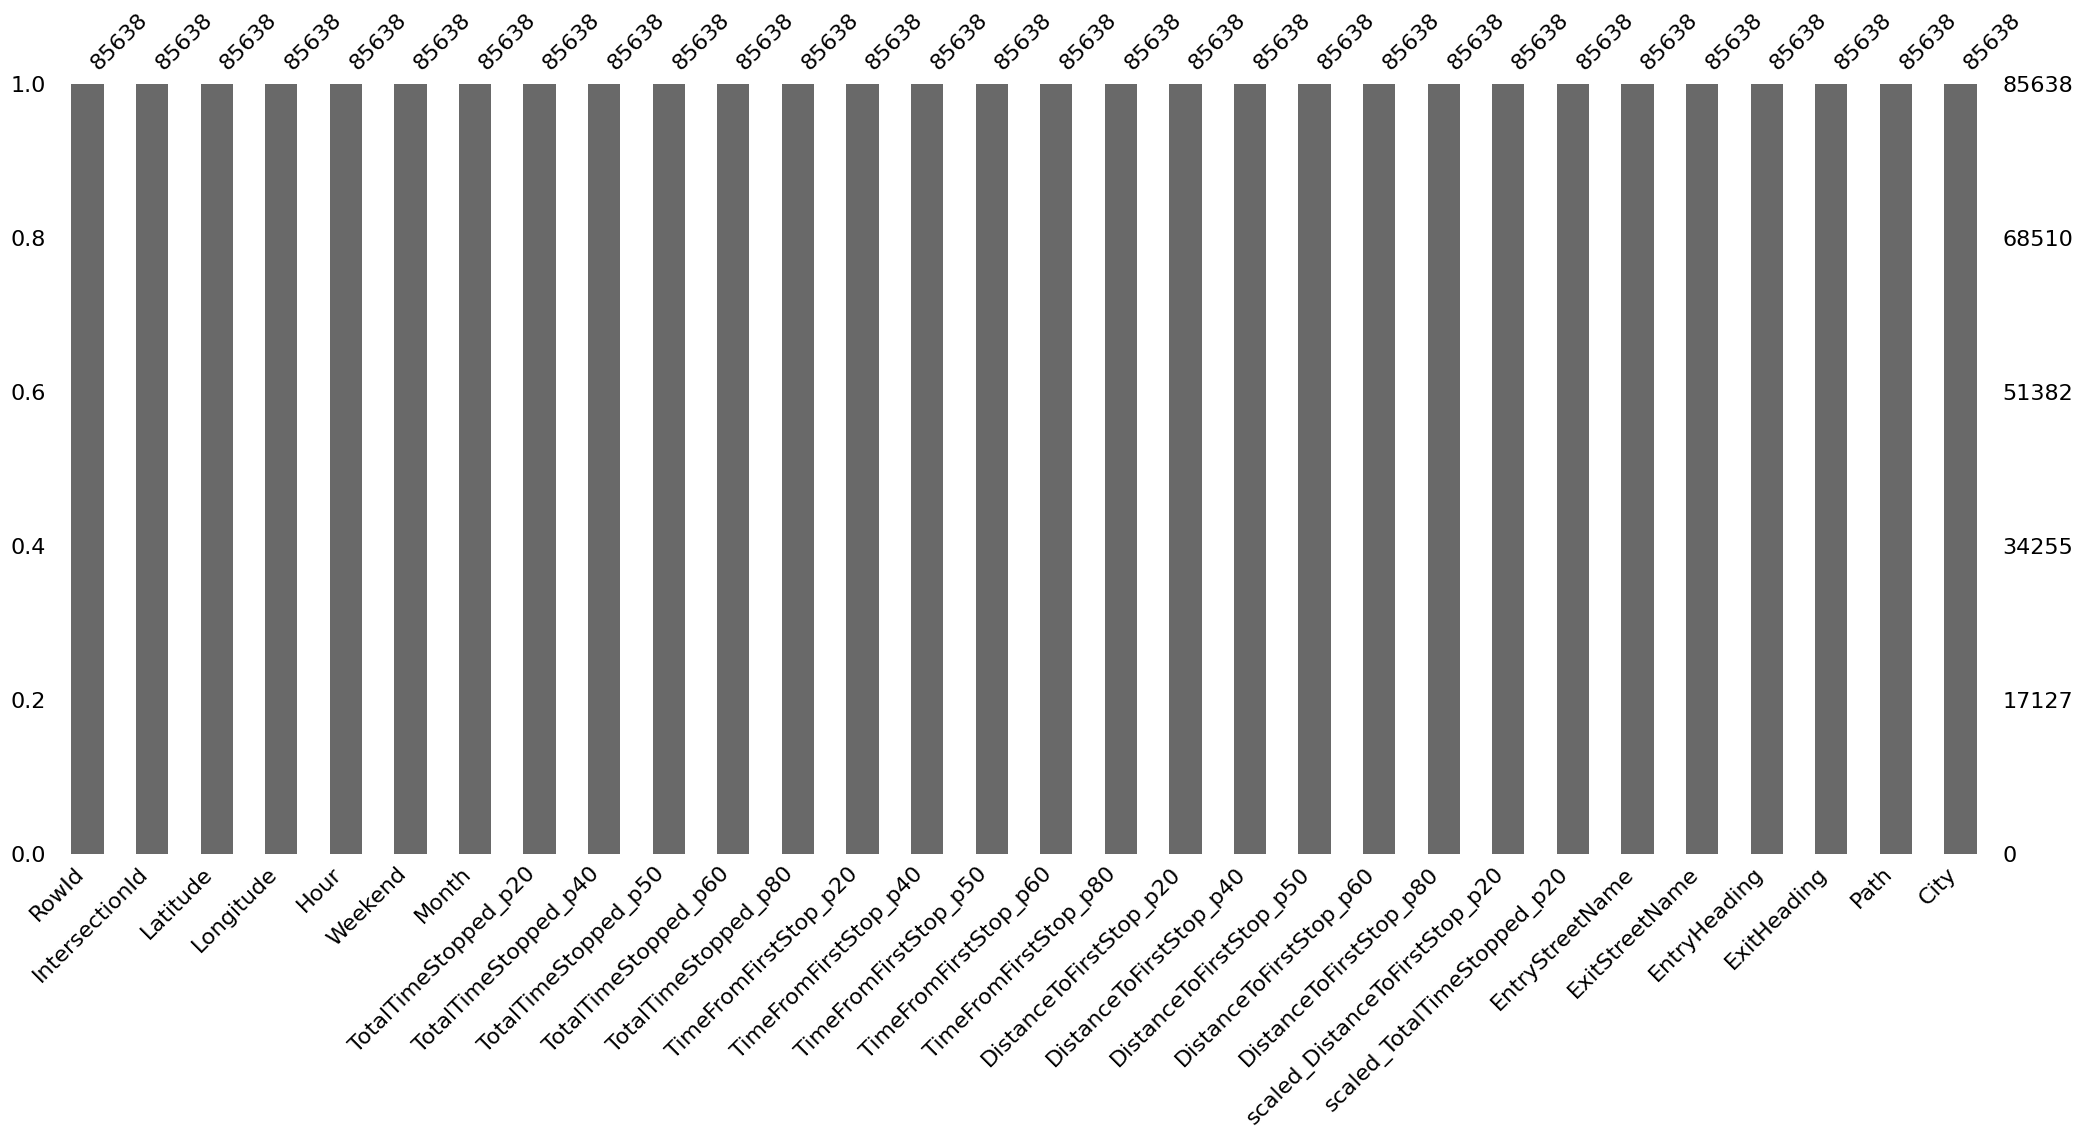

In [70]:
msno.bar(imputed_values)
plt.show()

### 3.B Transformacion de caracteristicas

In [9]:
train = pd.concat([
    train,
    pd.get_dummies(train["EntryHeading"], prefix='en'),
    pd.get_dummies(train["ExitHeading"], prefix='ex')
], axis=1)

test = pd.concat([
    test,
    pd.get_dummies(test["EntryHeading"], prefix='en'),
    pd.get_dummies(test["ExitHeading"], prefix='ex')
], axis=1)

with pd.option_context('display.max_columns', None):
    print(f"[INFO] Training dataset dimnesions (rows, cols): {train.shape}")
    display(train.head())

[INFO] Training dataset dimnesions (rows, cols): (856387, 45)


,RowId,IntersectionId,Latitude,Longitude,EntryStreetName,ExitStreetName,EntryHeading,ExitHeading,Hour,Weekend,Month,Path,TotalTimeStopped_p20,TotalTimeStopped_p40,TotalTimeStopped_p50,TotalTimeStopped_p60,TotalTimeStopped_p80,TimeFromFirstStop_p20,TimeFromFirstStop_p40,TimeFromFirstStop_p50,TimeFromFirstStop_p60,TimeFromFirstStop_p80,DistanceToFirstStop_p20,DistanceToFirstStop_p40,DistanceToFirstStop_p50,DistanceToFirstStop_p60,DistanceToFirstStop_p80,City,city_intersec_id,en_E,en_N,en_NE,en_NW,en_S,en_SE,en_SW,en_W,ex_E,ex_N,ex_NE,ex_NW,ex_S,ex_SE,ex_SW,ex_W
0,1921357,0,33.791659,-84.430032,Marietta Boulevard Northwest,Marietta Boulevard Northwest,NW,NW,0,0,6,Marietta Boulevard Northwest_NW_Marietta Boule...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Atlanta,Atlanta_0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0
1,1921358,0,33.791659,-84.430032,Marietta Boulevard Northwest,Marietta Boulevard Northwest,SE,SE,0,0,6,Marietta Boulevard Northwest_SE_Marietta Boule...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Atlanta,Atlanta_0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0
2,1921359,0,33.791659,-84.430032,Marietta Boulevard Northwest,Marietta Boulevard Northwest,NW,NW,1,0,6,Marietta Boulevard Northwest_NW_Marietta Boule...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Atlanta,Atlanta_0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0
3,1921360,0,33.791659,-84.430032,Marietta Boulevard Northwest,Marietta Boulevard Northwest,SE,SE,1,0,6,Marietta Boulevard Northwest_SE_Marietta Boule...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Atlanta,Atlanta_0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0
4,1921361,0,33.791659,-84.430032,Marietta Boulevard Northwest,Marietta Boulevard Northwest,NW,NW,2,0,6,Marietta Boulevard Northwest_NW_Marietta Boule...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Atlanta,Atlanta_0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0


In [21]:
def transform(dataframe: pd.DataFrame) -> pd.DataFrame:
    # Label encoding for InHeading and ExHeading, i.e. 0--7 (N to NW)
    dataframe['in_heading'] = 0
    dataframe['ex_heading'] = 0

    headings = ['N', 'NE', 'E', 'SE', 'S', 'SW', 'W', 'NW']
    for ihead, this_head in enumerate(headings):
        dataframe.loc[dataframe['EntryHeading'] == this_head, 'in_heading'] = ihead
        dataframe.loc[dataframe['ExitHeading'] == this_head, 'ex_heading'] = ihead

    # The turn -> 0 = straight; 1,2,3 = right; -1,-2,-3,-4 = left to U-turn
    dataframe['turn'] = dataframe['ex_heading'] - dataframe['in_heading']
    # Keep it between -4 to 3 -> If turn > 3 then turn = turn - 8
    criterion = dataframe['turn'] > 3
    dataframe.loc[criterion, 'turn'] = dataframe.loc[criterion, 'turn'] - 8
    # If turn < -4 then turn = turn + 8
    criterion = dataframe['turn'] < -4
    dataframe.loc[criterion, 'turn'] = dataframe.loc[criterion, 'turn'] + 8

    # Simplifying the turns -> Left, straight, or right
    dataframe['turn_lsr'] = 0
    criterion = dataframe['turn'] > 0
    dataframe.loc[criterion, 'turn_lsr'] = 1
    criterion = dataframe['turn'] < 0
    dataframe.loc[criterion, 'turn_lsr'] = -1
    return dataframe

In [22]:
train, test = transform(dataframe=train), transform(dataframe=test)

with pd.option_context('display.max_columns', None):
    print(f"[INFO] Training dataset dimnesions (rows, cols): {train.shape}")
    display(train.head())

[INFO] Training dataset dimnesions (rows, cols): (856387, 49)


,RowId,IntersectionId,Latitude,Longitude,EntryStreetName,ExitStreetName,EntryHeading,ExitHeading,Hour,Weekend,Month,Path,TotalTimeStopped_p20,TotalTimeStopped_p40,TotalTimeStopped_p50,TotalTimeStopped_p60,TotalTimeStopped_p80,TimeFromFirstStop_p20,TimeFromFirstStop_p40,TimeFromFirstStop_p50,TimeFromFirstStop_p60,TimeFromFirstStop_p80,DistanceToFirstStop_p20,DistanceToFirstStop_p40,DistanceToFirstStop_p50,DistanceToFirstStop_p60,DistanceToFirstStop_p80,City,city_intersec_id,en_E,en_N,en_NE,en_NW,en_S,en_SE,en_SW,en_W,ex_E,ex_N,ex_NE,ex_NW,ex_S,ex_SE,ex_SW,ex_W,in_heading,ex_heading,turn,turn_lsr
0,1921357,0,33.791659,-84.430032,Marietta Boulevard Northwest,Marietta Boulevard Northwest,NW,NW,0,0,6,Marietta Boulevard Northwest_NW_Marietta Boule...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Atlanta,Atlanta_0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,7,7,0,0
1,1921358,0,33.791659,-84.430032,Marietta Boulevard Northwest,Marietta Boulevard Northwest,SE,SE,0,0,6,Marietta Boulevard Northwest_SE_Marietta Boule...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Atlanta,Atlanta_0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,3,3,0,0
2,1921359,0,33.791659,-84.430032,Marietta Boulevard Northwest,Marietta Boulevard Northwest,NW,NW,1,0,6,Marietta Boulevard Northwest_NW_Marietta Boule...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Atlanta,Atlanta_0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,7,7,0,0
3,1921360,0,33.791659,-84.430032,Marietta Boulevard Northwest,Marietta Boulevard Northwest,SE,SE,1,0,6,Marietta Boulevard Northwest_SE_Marietta Boule...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Atlanta,Atlanta_0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,3,3,0,0
4,1921361,0,33.791659,-84.430032,Marietta Boulevard Northwest,Marietta Boulevard Northwest,NW,NW,2,0,6,Marietta Boulevard Northwest_NW_Marietta Boule...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Atlanta,Atlanta_0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,7,7,0,0


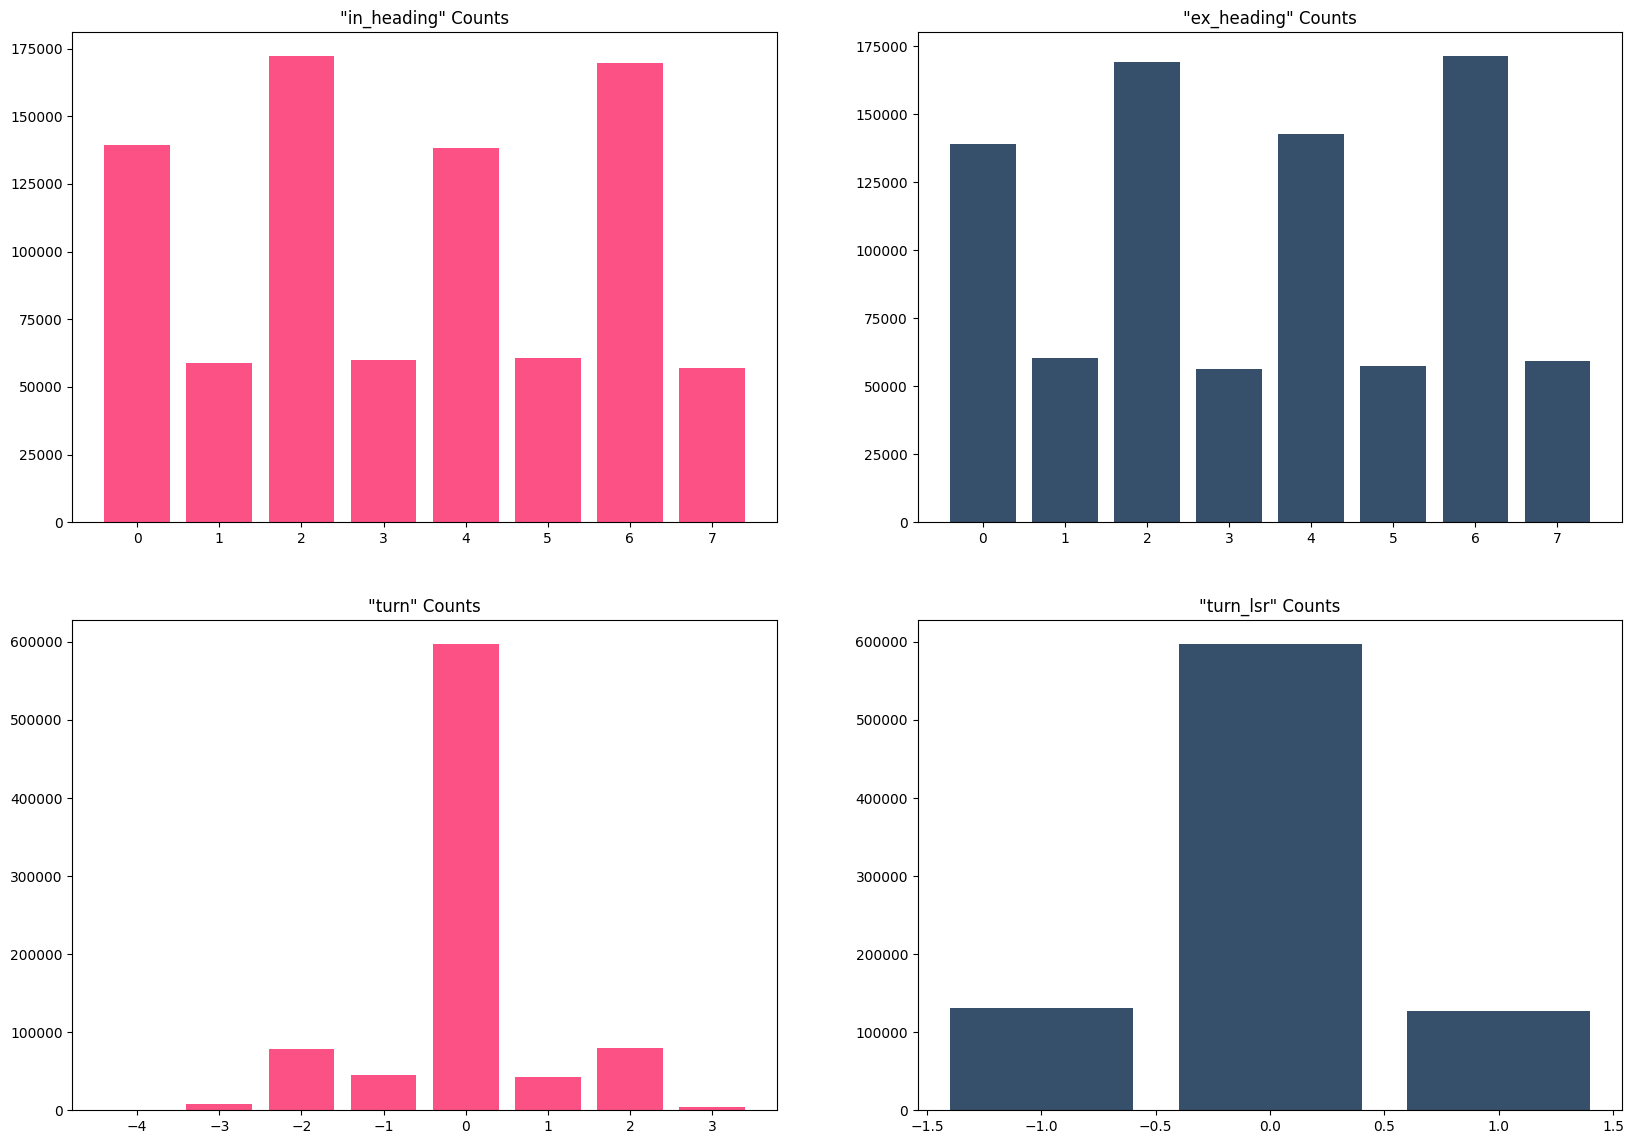

In [23]:
new_features = list(train.columns)[list(train.columns).index("ex_W") + 1:]
features_by_row = {0: new_features[0:2], 1: new_features[2:5]}
colors_by_row = {0: ["#FC5185", "#364F6B"], 1: ["#FC5185",  "#364F6B"]}

f, axes = plt.subplots(2, 2, figsize=(20, 14))
for (row, features), (_, colors) in zip(features_by_row.items(), colors_by_row.items()):
    for index in range(len(features)):
        ax = axes[row, index]
        counts = train[features[index]].value_counts()
        ax.bar(counts.index, counts.values, color=colors[index])
        ax.set_title(f"\"{features[index]}\" Counts")
plt.show()

### 4.C Selección de caracteristicas

In [74]:
baseline_features = [
       'Hour', 'Weekend', 'Month', 'en_E', 'en_N', 'en_NE', 'en_NW', 'en_S', 'en_SE', 'en_SW',
       'en_W', 'ex_E','ex_N', 'ex_NE', 'ex_NW', 'ex_S', 'ex_SE', 'ex_SW', 'ex_W'
]
features = baseline_features + ['in_heading', 'ex_heading', 'turn', 'turn_lsr']

time_targets = [
       "TotalTimeStopped_p20",
       "TotalTimeStopped_p40",
       "TotalTimeStopped_p50",
       "TotalTimeStopped_p60",
       "TotalTimeStopped_p80"
]
distance_targets = [
       "DistanceToFirstStop_p20",
       "DistanceToFirstStop_p40",
       "DistanceToFirstStop_p50",
       "DistanceToFirstStop_p60",
       "DistanceToFirstStop_p80"
]
targets = [
       "TotalTimeStopped_p20",
       "DistanceToFirstStop_p20",
       "TotalTimeStopped_p40",
       "DistanceToFirstStop_p40",
       "TotalTimeStopped_p50",
       "DistanceToFirstStop_p50",
       "TotalTimeStopped_p60",
       "DistanceToFirstStop_p60",
       "TotalTimeStopped_p80",
       "DistanceToFirstStop_p80"
]

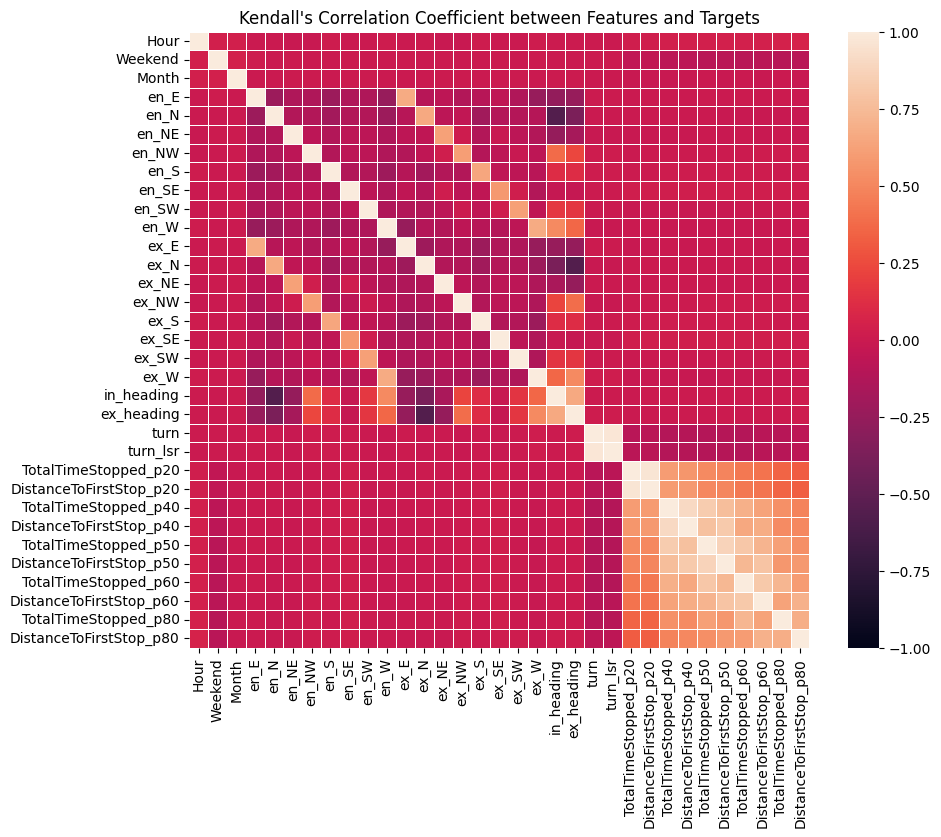

In [75]:
ax = plot_corr(
    train[features + targets],
    title="Features and Targets",
    method="kendall",
    annot=False
)
plt.show()

<a id="entrenamiento-de-modelos"></a>
## 5. Entrenamiento de modelos

In [76]:
from sklearn.model_selection import train_test_split

SEED = 42


train_df, val_df = train_test_split(
    train,
    test_size=0.30,
    random_state=SEED,
    shuffle=True
)

In [77]:
X_train_base, X_val_base = train_df[baseline_features], val_df[baseline_features]
X_train, X_val = train_df[features], val_df[features]

y_train_time, y_val_time = train_df[time_targets], val_df[time_targets]
y_train_dist, y_val_dist = train_df[distance_targets], val_df[distance_targets]
y_train, y_val = train_df[targets], val_df[targets]

In [78]:
from sklearn.ensemble import RandomForestRegressor

params = {"max_depth": 6, "n_estimators": 200, "random_state": SEED, "n_jobs": -1}

regr_t20 = RandomForestRegressor(**params)
regr_t20.fit(X_train_base.values, y_train_time["TotalTimeStopped_p20"].values)

regr_d20 = RandomForestRegressor(**params)
regr_d20.fit(X_train_base.values, y_train_dist["DistanceToFirstStop_p20"].values)

regr_t50 = RandomForestRegressor(**params)
regr_t50.fit(X_train_base.values, y_train_time["TotalTimeStopped_p50"].values)

regr_d50 = RandomForestRegressor(**params)
regr_d50.fit(X_train_base.values, y_train_dist["DistanceToFirstStop_p50"].values)

regr_t80 = RandomForestRegressor(**params)
regr_t80.fit(X_train_base.values, y_train_time["TotalTimeStopped_p80"].values)

regr_d80 = RandomForestRegressor(**params)
regr_d80.fit(X_train_base.values, y_train_dist["DistanceToFirstStop_p80"].values)

RandomForestRegressor(max_depth=6, n_estimators=200, n_jobs=-1, random_state=42)

In [79]:
from sklearn.metrics import mean_absolute_percentage_error, mean_squared_error


def evaluate_predictions(regr, X_test, y_test, target):
    y_true = y_test[target].values
    y_pred = regr.predict(X_test.values).astype(int)
    rmse = mean_squared_error(y_true, y_pred, squared=False)
    return rmse

In [80]:
models = {"p20": (regr_t20, regr_d20), "p50": (regr_t50, regr_d50), "p80": (regr_t80, regr_d80)}
submit_targets =  [
    ("TotalTimeStopped_p20", "DistanceToFirstStop_p20"),
    ("TotalTimeStopped_p50", "DistanceToFirstStop_p50"),
    ("TotalTimeStopped_p80", "DistanceToFirstStop_p80")
]

for (model_type, model_couple), target_couple in zip(models.items(), submit_targets):
    time_rmse = evaluate_predictions(
        model_couple[0], X_val_base, y_val_time, target_couple[0]
    )
    dist_rmse = evaluate_predictions(
        model_couple[1], X_val_base, y_val_dist, target_couple[1]
    )
    print(
        f"[INFO] \"regr_t{model_type[1:]}\" ->  RMSE: {np.round(time_rmse, 3)} ",
        f"\"regr_t{model_type[1:]}\" ->  RMSE: {np.round(dist_rmse, 3)}", 
    )

[INFO] "regr_t20" ->  RMSE: 7.105  "regr_t20" ->  RMSE: 30.418
[INFO] "regr_t50" ->  RMSE: 15.318  "regr_t50" ->  RMSE: 75.125
[INFO] "regr_t80" ->  RMSE: 27.386  "regr_t80" ->  RMSE: 159.372


In [81]:
%%time
params = {"max_depth": 6, "n_estimators": 200, "random_state": SEED, "n_jobs": -1}

regr_t20 = RandomForestRegressor(**params)
regr_t20.fit(X_train.values, y_train_time["TotalTimeStopped_p20"].values)

regr_d20 = RandomForestRegressor(**params)
regr_d20.fit(X_train.values, y_train_dist["DistanceToFirstStop_p20"].values)

regr_t50 = RandomForestRegressor(**params)
regr_t50.fit(X_train.values, y_train_time["TotalTimeStopped_p50"].values)

regr_d50 = RandomForestRegressor(**params)
regr_d50.fit(X_train.values, y_train_dist["DistanceToFirstStop_p50"].values)

regr_t80 = RandomForestRegressor(**params)
regr_t80.fit(X_train.values, y_train_time["TotalTimeStopped_p80"].values)

regr_d80 = RandomForestRegressor(**params)
regr_d80.fit(X_train.values, y_train_dist["DistanceToFirstStop_p80"].values)

CPU times: user 18min 7s, sys: 13.2 s, total: 18min 20s
Wall time: 3min 27s


RandomForestRegressor(max_depth=6, n_estimators=200, n_jobs=-1, random_state=42)

In [82]:
models = {
    "p20": (regr_t20, regr_d20),
    "p50": (regr_t50, regr_d50),
    "p80": (regr_t80, regr_d80)
}
submit_targets =  [
    ("TotalTimeStopped_p20", "DistanceToFirstStop_p20"),
    ("TotalTimeStopped_p50", "DistanceToFirstStop_p50"),
    ("TotalTimeStopped_p80", "DistanceToFirstStop_p80")
]

for (model_type, model_couple), target_couple in zip(models.items(), submit_targets):
    time_rmse = evaluate_predictions(
        model_couple[0], X_val, y_val_time, target_couple[0]
    )
    dist_rmse = evaluate_predictions(
        model_couple[1], X_val, y_val_dist, target_couple[1]
    )
    print(
        f"[INFO] \"regr_t{model_type[1:]}\" ->  RMSE: {np.round(time_rmse, 3)} ",
        f"\"regr_d{model_type[1:]}\" ->  RMSE: {np.round(dist_rmse, 3)}", 
    )

[INFO] "regr_t20" ->  RMSE: 7.024  "regr_d20" ->  RMSE: 30.302
[INFO] "regr_t50" ->  RMSE: 14.974  "regr_d50" ->  RMSE: 74.895
[INFO] "regr_t80" ->  RMSE: 26.631  "regr_d80" ->  RMSE: 159.137


In [1]:
# PUT YOUR CODE HERE FOR EXCERCISE 3

<a id="ejercicios-22"></a>
## Ejercicios

<ol>
    <li>
        Qué suposiciones puede hacer sobre la instancia <code>RowId = 1949667</code>, para los siguientes valores:
        <ol type="a">
            <li><code>TotalTimeStopped_p20</code> -> 0.0</li>
            <li><code>TotalTimeStopped_p40</code> -> 0.0</li>
            <li><code>TotalTimeStopped_p50</code> -> 8.0</li>
            <li><code>TotalTimeStopped_p60</code> -> 11.0</li>
            <li><code>TotalTimeStopped_p80</code> -> 31.0</li>
        </ol>
    </li><br>
    <li>
        En el análisis de correlaciones, se dice que el 68% de los registros de las variables `TotalTimeStopped_p20` y `TotalTimeStopped_p50` corresponden a cero. Explique que entiende por el valor de cero en un registro de una intersección vial (`IntersectionId`), para las variables `p20` y `p50` del tipo de variable `TotalTimeStopped`.
    </li><br>
    <li>
        Ahora es momento de entrenar su propio modelo utilizando la biblioteca <a href="https://scikit-learn.org/stable/index.html">scikit-learn</a>. Solo debe realizar un cambio en cualquiera de los pasos previos, que mejore el rendimiento alcanzado por el modelo <i>baseline</i>. Explique el por qué del cambio y por qué mejora el rendimiento del modelo base. Puede escoger algunas de las siguientes ideas para mejorar el rendimiento de sus modelos:
        <ul>
            <li>
                Modifique la seleccion de caracteristicas.
            </li>
            <li>
                Proponga la creacion de nuevas caracteristicas a partir de las ya propuestas en este cuaderno.
            </li>
            <li>
                Incluya nuevos hiperparametros apoyandose en las observaciones que hemos hecho sobre el conjunto de datos.
            </li>
            <li>
                Optimize algunos hiperparametros.
            </li>
            <li>
                Implemente otro algoritmo de machine learning.
            </li>
            <li>
                Modifique el enfoque de entrenamiento y prediccion de <i>single-output</i> a <i>multi-output</i>. 
            </li>
        </ul>
    </li>
</ol>

```sh
Baseline Metrics

[INFO] "regr_t20" ->  RMSE: 7.024  "regr_t20" ->  RMSE: 30.302
[INFO] "regr_t50" ->  RMSE: 14.974  "regr_t50" ->  RMSE: 74.895
[INFO] "regr_t80" ->  RMSE: 26.631  "regr_t80" ->  RMSE: 159.137
```

<a id='referencias'></a>
## Referencias

[1] Halswanter, T. (2016). *An Introduction to Statistics with Python: With Applications in the Life Sciences.* Springer.

[2] Géron, A. (2022). *Hands-on machine learning with Scikit-Learn, Keras, and TensorFlow.* " O'Reilly Media, Inc.".

[3] VanderPlas, J. (2016). *Python data science handbook: Essential tools for working with data.* " O'Reilly Media, Inc.".

[4] Aggarwal, C. C. (2015). *Data mining: the textbook (Vol. 1)*. New York: springer.

<a id='contribuir'></a>
## Contribuir

<p>Para correcciones, <i>bugs</i> o sugerencias, por favor escribe a <a href="mailto:joseph@guane.com.co">info@joefaver.dev</a> o directamente en el repositorio.</p>